## ML Project
### Context
All Life Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data Scientist at All Life Bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

 Identify which segment of customers to target more. The task is to analyze the data, use ML to segment the customers into distinct groups, and identify the characteristics of each group to help increase marketing efficiency and effectiveness, identify and develop retention strategies for high-value customers, and help the management make informed business strategies on purchasing the personal loan.

### Data Dictionary

ID: Customer ID \
Age: Customer’s age in completed years\
Experience: # years of professional experience\
Income: Annual income of the customer (in thousand dollars)\
ZIP Code: Home Address ZIP code\
Family: The family size of the customer\
CCAvg: Average spending on credit cards per month (in thousand dollars)\
Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional\
Mortgage: Value of house mortgage if any. (in thousand dollars)\
Personal_Loan: Did this customer accept the personal loan offered in the last campaign?\
Securities_Account: Does the customer have a securities account with the bank?\
CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?\
Online: Do customers use Internet banking facilities?\
CreditCard: Does the customer use a credit card issued by any other Bank (excluding All Life Bank)?


### Importing necessary libraries

In [ ]:
# Write your code here to import necessary libraries for the project

# Packages for data manipulation
import pandas as pd
import numpy as np

# Package for ploting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# For AI Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# For Decision Tree
# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# For Clustering
# Libraries for scaling numerical features
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering
from sklearn.cluster import KMeans

# to perform silhouette analysis
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE

# to define a common seed value to be used throughout
RS=0

# For US zipcode
#import zipcodes

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Loading the data

In [ ]:
# read data and save in dataframe object
df=pd.read_csv('/content/drive/MyDrive/content/drive/Loan_Modelling.csv')

# sava a copy
data=df.copy()





- Created a copy of dataframe to save the original data

### Overview of data

In [ ]:
# Display first 5 rows
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
# View last 5 rows
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Checking the size of data

In [ ]:
# Checking the size of data
data.shape

(5000, 14)

- Dataset has 5000 rows and 13 features

### Checking for unique values in ID

In [ ]:
# Check for unique value count
data['ID'].nunique()

5000

- ID column can be droped since it has unique values

### Droping ID column with unique values

In [ ]:
# Drop column ID
data.drop('ID',axis=1,inplace=True)

### Checking the attribute types

In [ ]:
# Checking for datatypes and properties
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB



- Dataset has 13 numerical  and zero categorical variables
- Dataset has no null values

### Check for data types

In [ ]:
data.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

- All of them are integers except CCAVG, which is Floating point number

### Checking for missing values

In [ ]:
# Find missing values
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- There is no missing values in the dataset

### Checking for duplicate values

In [ ]:
# Find duplicate values
print(data.duplicated().sum())

0


- No duplicates in the dataset

#### Check Samples

In [ ]:
# View a single sample
data.sample()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
4223   53          26       8    94709       1    0.5          2         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
4223              0                   0           0       0           1

### Statistical Summary

In [ ]:
# Statistical summary
data.describe(include='all').T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

- On an average customer income is \$73000.
- The highest income is \$224000
- Majority of customers are in the age 45.
- The age of customers is from 23 to 67.
- The minimum professional experience is -3 years, this is defintely incorrect data

### Exploratory Data Analysis
#### Univariate Analysis

In [ ]:
# Check for  the negative values in Experience column
print("There are ",data[data['Experience']<0].count()[0]," negative values in Experience column")

There are  52  negative values in Experience column


In [ ]:
# Replace negative values in Experience with absolute values
data['Experience']=data['Experience'].apply(lambda x: abs(x) if (x<0) else x)
# Check for  the negative values in Experience column
print("There are ",data[data['Experience']<0].count()[0]," negative values in Experience column")

There are  0  negative values in Experience column


In [ ]:
# Check whether the Experience values are valid in terms of Age column
data['isValidExp']= data.apply(
    lambda row: 0 if (row['Age'] > row['Experience']) else 1, axis=1
)
# Display any invalid rows
data[data['isValidExp']==1]


Empty DataFrame
Columns: [Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard, isValidExp]
Index: []

In [ ]:
# Drop isValidExp from dataframe
data.drop('isValidExp',axis=1,inplace=True)

- All the Experience values are valid in terms of Age.
- Replaced negative experienced values with its absolute value

In [ ]:
# Function to plot histogram
def plot_hist(data,feature,i):
  plt.subplot(5,3,i+1)
  sns.histplot(data,x=feature)


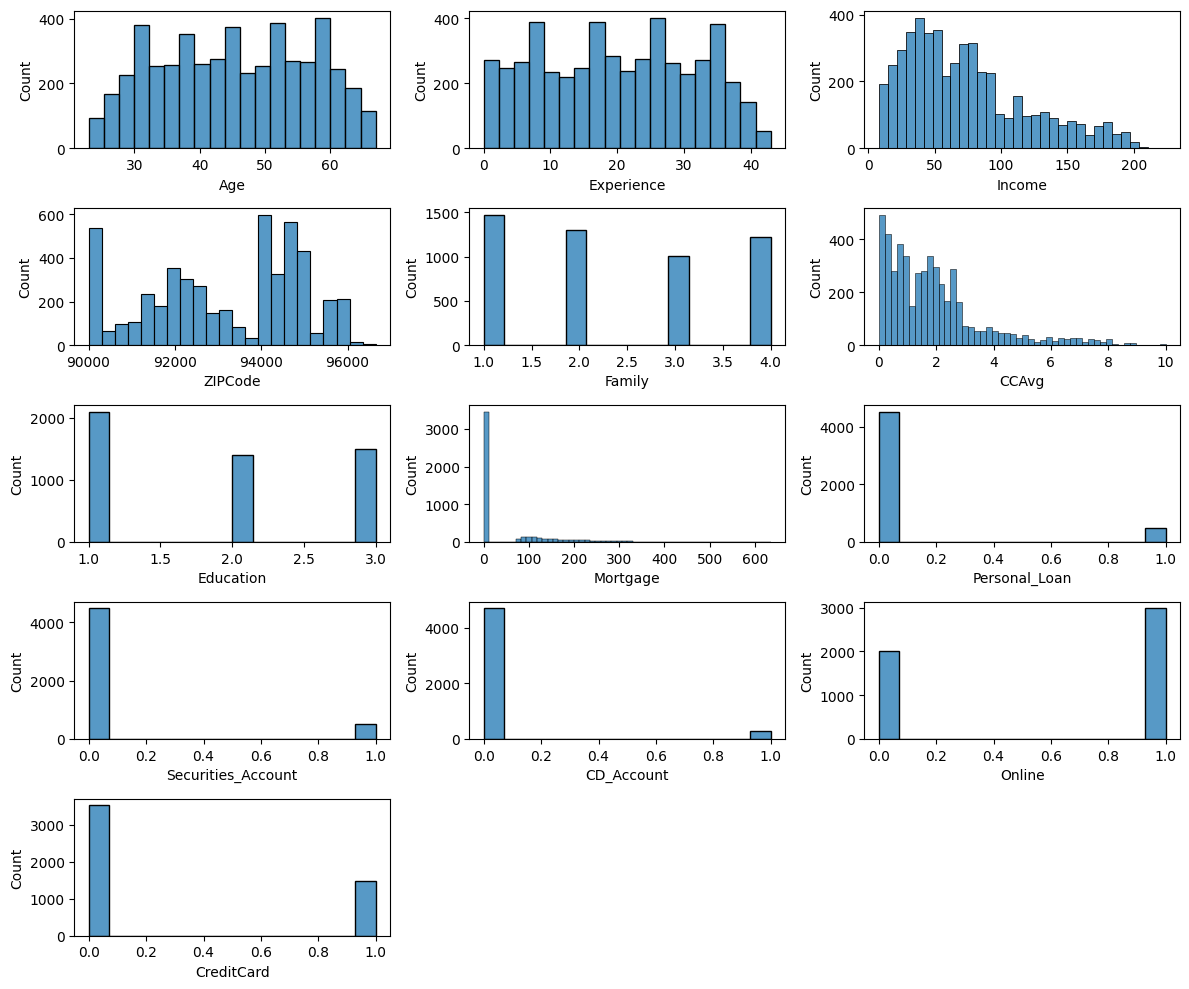

In [ ]:
# Iterate over each numerical features
plt.figure(figsize=(12,10))
for i,feature in enumerate(data.columns):
  plot_hist(data,feature,i)
plt.tight_layout()


- Age and Experience seems to have uniform distributions, but there are a few peaks
- Income and CCAvg are right skewed


In [ ]:
# Function to plot box plot
def plot_box(data,feature,i):
  # Define subplots
  plt.subplot(5,3,i+1)
  #plot boxplot
  sns.boxplot(data,x=feature,showmeans=True)


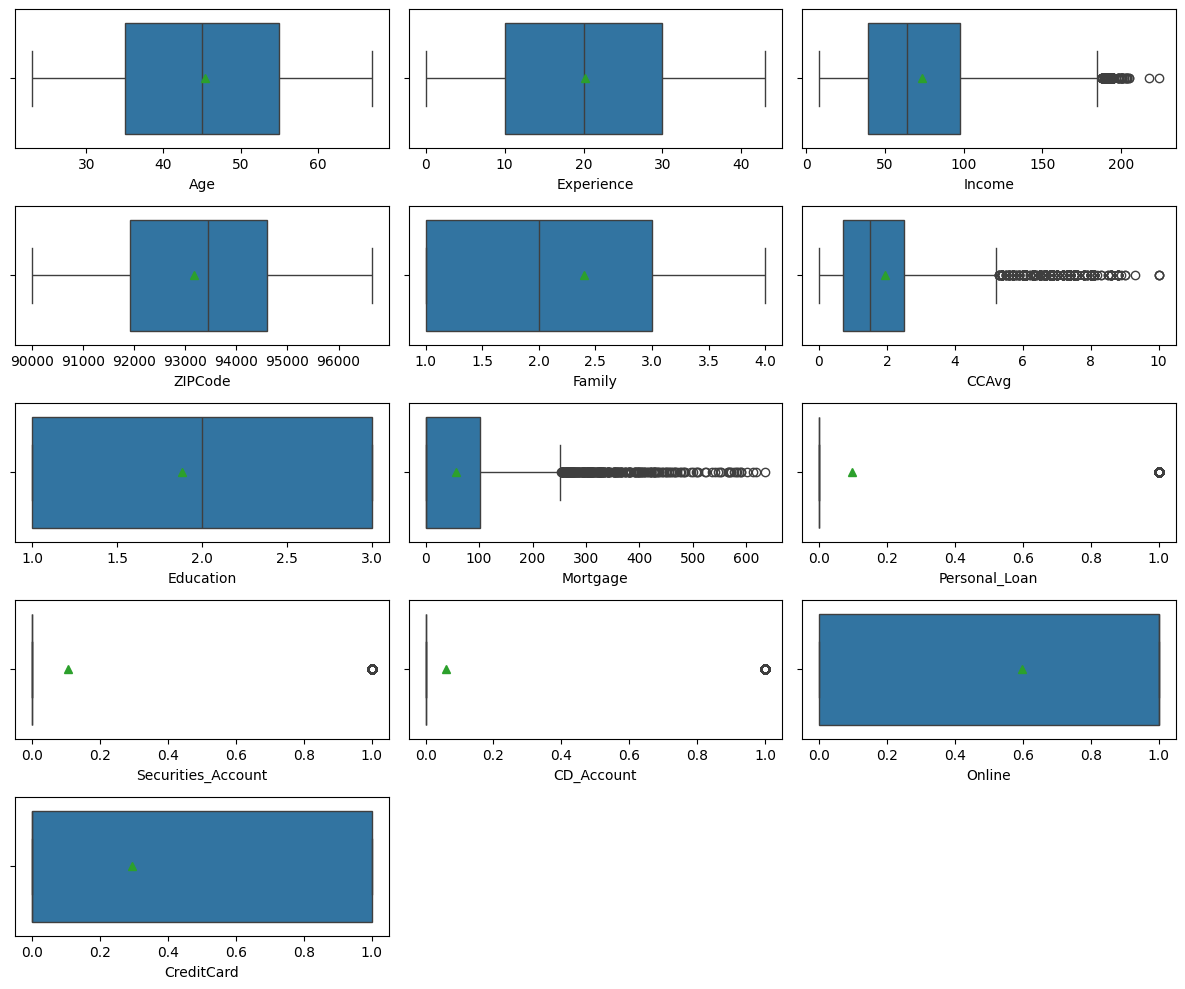

In [ ]:
# Set the figure size
plt.figure(figsize=(12,10))
# Iterate over each numerical features
for i,feature in enumerate(data.columns):
  plot_box(data,feature,i,)
plt.tight_layout()


- Income has some outliers, there are customers having high income than the average income.
- CCAvg has ouliers, there are customers spend a lot using their credit cards
- Mortgage has also outliers, majority of customers spent a lot on mortgage

### Feature Engineering
- There could be some patterns by grouping the rows based on age
### New categorical column Age_Group

In [ ]:
# Create a new categorical Column Age_Group
data['Age_Group'] = data['Age'].apply(
    lambda x: 'Young' if (x <= 30) and (x > 0)
    else "Middle" if(x>30 and x<=60)  else "Old" )



In [ ]:
# View a sample
data.sample()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
1771   46          21       9    95023       2    0.7          3         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
1771              0                   0           0       1           0   

     Age_Group  
1771    Middle

In [ ]:
# Group by Age_Group and view the number of customers in each group
data.groupby('Age_Group')['Age'].count()

Age_Group
Middle    3829
Old        547
Young      624
Name: Age, dtype: int64

- The number of old people and young people are less when compared to Middle aged people

### New categorical column Education Level

In [ ]:
# Create a new categorical column Education Level
data['Education_Level'] = data['Education'].apply(
    lambda x: 'Under Graduate' if (x == 1) else "Graduate" if(x == 2)
    else "Advanced" if(x == 3) else None  )

In [ ]:
# View a sample
data.sample()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
2704   38          13     191    91710       2    3.0          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
2704              0                   0           0       1           0   

     Age_Group Education_Level  
2704    Middle  Under Graduate

### New  categorical column Region

In [ ]:
# Create a new categorical column Region
# Function to retrieve zipcode region
# def get_city_from_zip(zip_code):
#     try:
#         matches = zipcodes.matching(zip_code)
#         if matches:  # if list is not empty
#             return matches[0]['city']
#         else:
#             return 'Unknown'
#     except (ValueError, TypeError):
#         # Handle NaN, invalid strings, None, etc.
#         return 'Unknown'

# data['Region'] = data['ZIPCode'].apply(get_city_from_zip)

In [ ]:
# View a sample
data.sample()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
4708   62          37      10    92606       3    0.5          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
4708              0                   0           0       1           0   

     Age_Group Education_Level  
4708       Old  Under Graduate

- Couldn't find a proper package for the decoding

In [ ]:
# Drop column Region
#data.drop('Region',axis=1,inplace=True)

- Removed Region as this column is meaningless at this momemt

### New categorical column HasLoan

In [ ]:
# Create a new categorical column HasLoan
data['HasLoan'] = data['Personal_Loan'].apply(
    lambda x: 'Yes' if (x == 1) else 'No')




In [ ]:
# View a sample
data.sample()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
479   60          36     132    92154       2    6.0          1       470   

     Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
479              0                   0           0       1           1   

    Age_Group Education_Level HasLoan  
479    Middle  Under Graduate      No

In [ ]:
# Select Categorical  and numerical columns
cat_cols=data.select_dtypes(include='object').columns.to_list()
num_cols=data.select_dtypes(exclude='object').columns.to_list()


In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, i=0,perc=False):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    i : index of feature
    perc: whether to display percentages instead of count (default is False)

    """
    total=data.shape[0]
    # Define subplts
    plt.subplot(1,len(cat_cols),i+1)
    # Adjust x labels to 45 degree
    plt.xticks(rotation=45, fontsize=15)
    # Plot countplot
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired"
    )
    # display % over the bars
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage



In [ ]:
# Function to plot countplot on categorical column
def plot_count(data,feature,i):
  labeled_barplot(data, feature,i,perc=True)
  #sns.countplot(data,x=feature,palette="Paired")


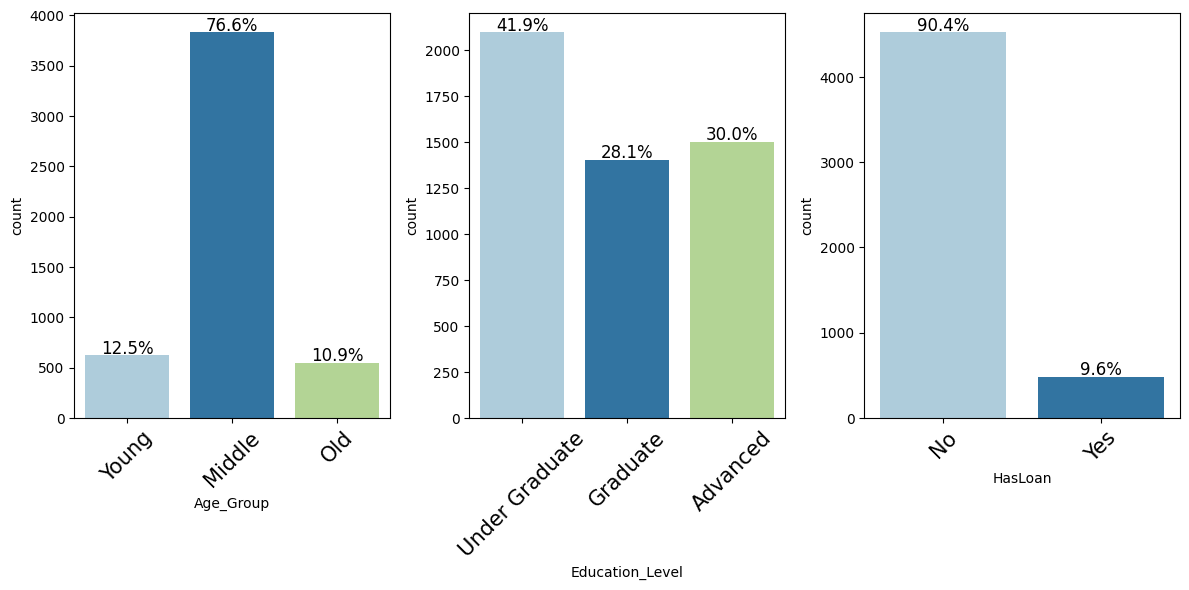

In [ ]:
#Iterate over each numerical features
plt.figure(figsize=(12,6))
for i,feature in enumerate(cat_cols):
    plot_count(data,feature,i)
plt.tight_layout()


- Majority of customers belongs to Middle Age (30-60)
- Majority of customers are under graduated
- Majority of customers donot have a Loan

### Bivariate analysis
#### Find Correlation

<Axes: >

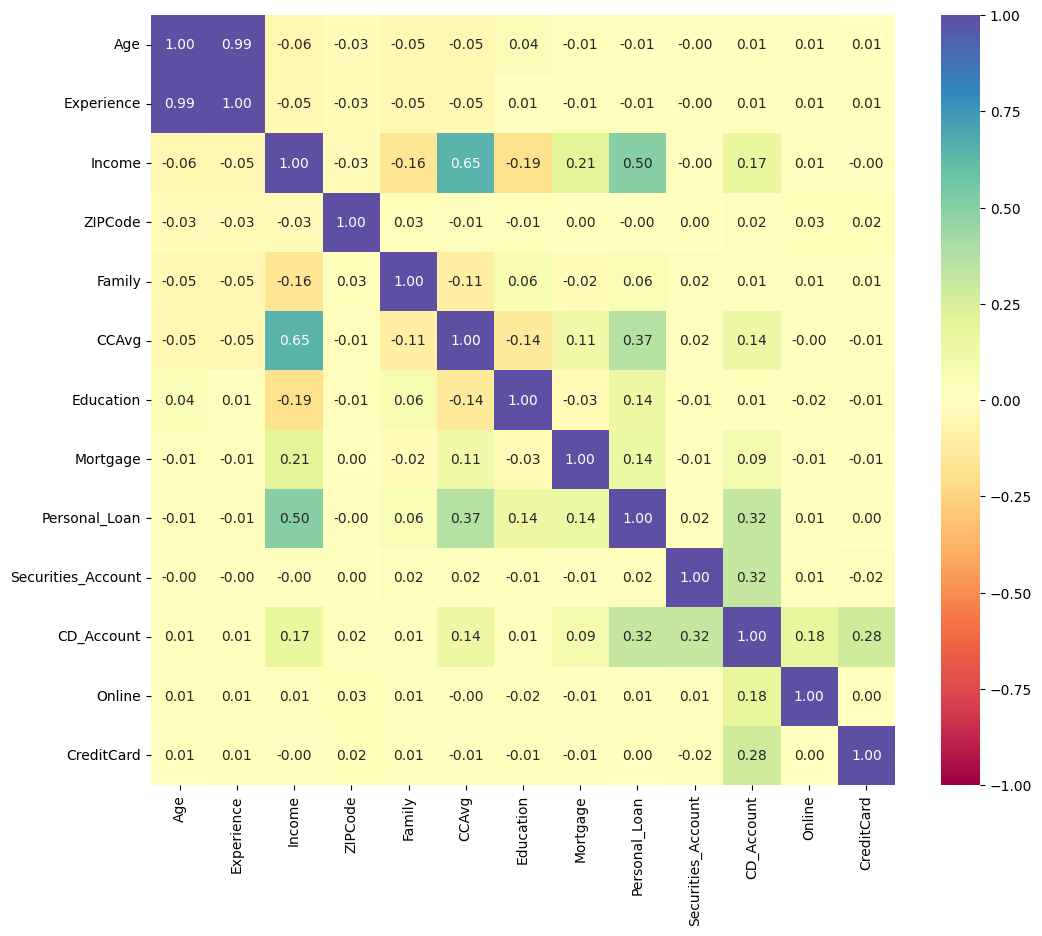

In [ ]:
# Define the size of the plot
plt.figure(figsize=(12,10))
# plotting the heatmap for correlation
sns.heatmap(data.corr(numeric_only=True),annot=True,vmin=-1,vmax=1,fmt="0.2f",cmap="Spectral")

### Visualize the relationships

[]

<Figure size 1500x1500 with 0 Axes>

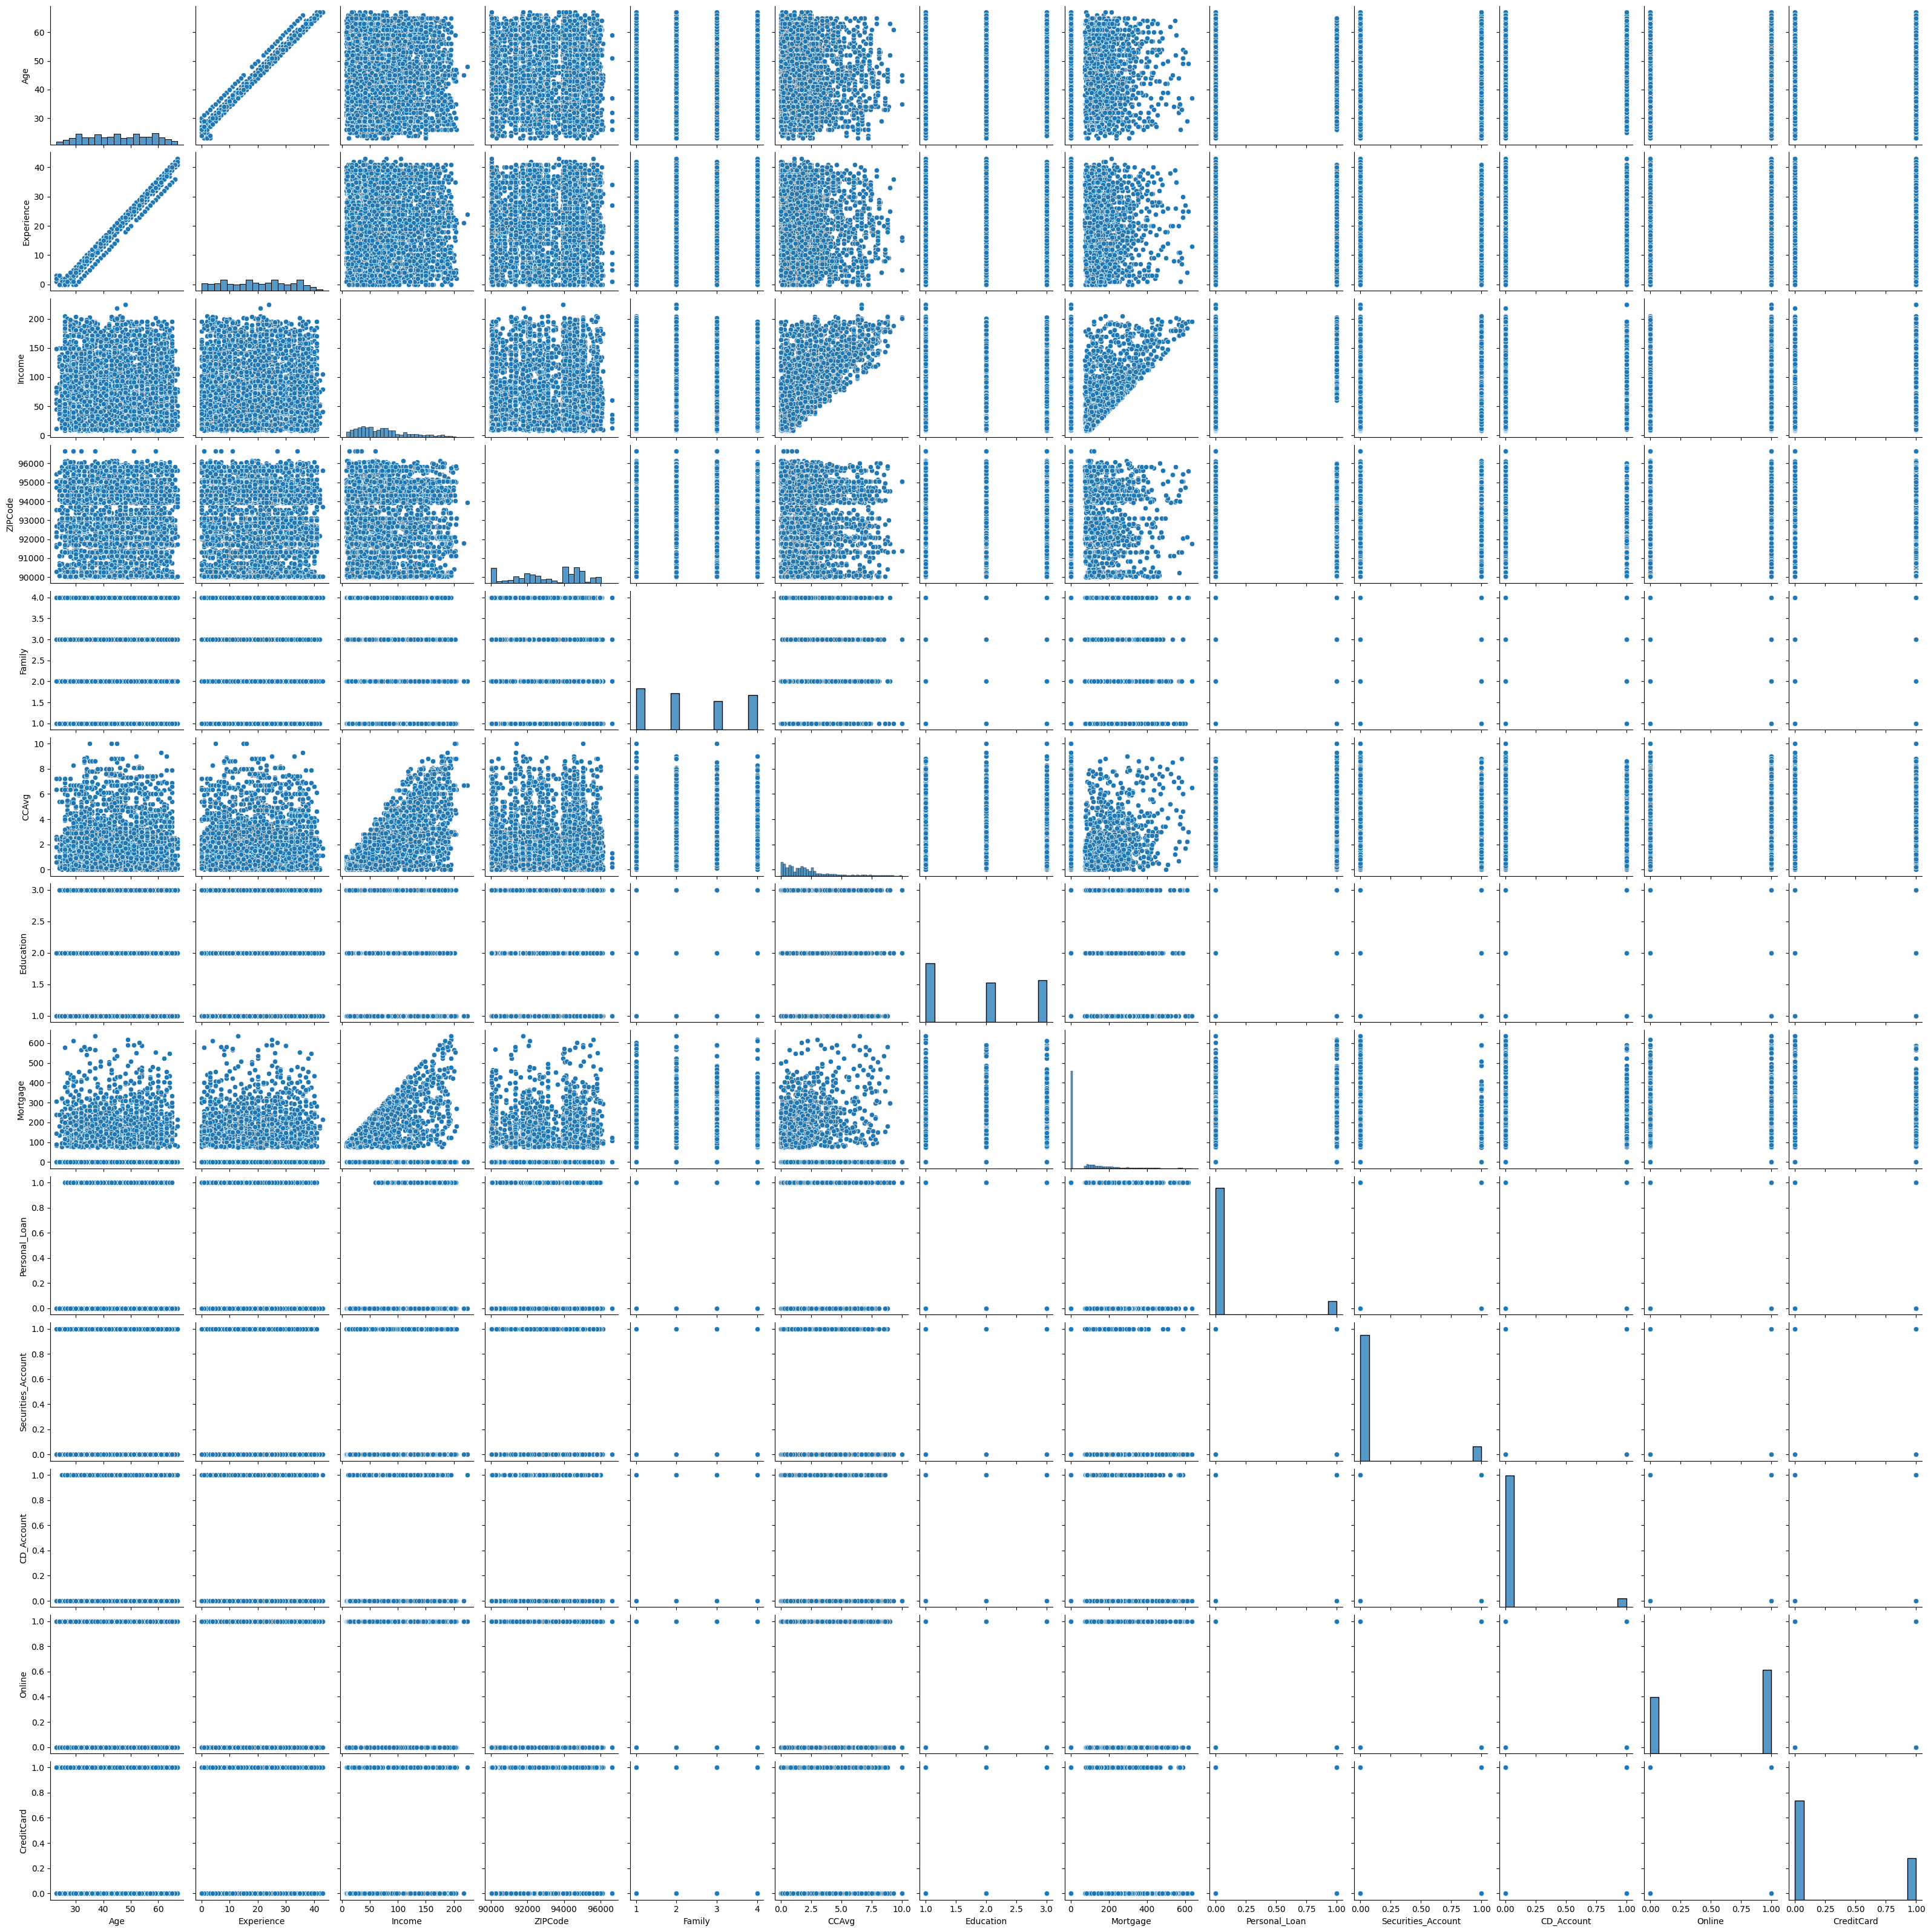

In [ ]:
# Plotting a pairplot
#Set the figure size
plt.figure(figsize=(15,15))
# Plot pairwise graphs
sns.pairplot(data)
plt.plot()

- Experience and Age has high positive correlation, ie the older customers has high experience that is obvious.
-Income and CCAvg has positive correlation, the customers who has high income spend more using credit cards
- Correlation between Personal_Loan and Income is lower than the correlation between CCAvg and Income.
- Income and Education are negatively correlated, which is strange
- CCAvg and Education are also negatively correlated

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, hue=None,perc=False):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)

    """

    total = data[feature].count()  # length of the column
    # Adjust x label to 45 degree
    plt.xticks(rotation=45, fontsize=15)
    if hue == None:
      ax = sns.countplot(
          data=data,
          x=feature,
          palette="Paired"

      )
    else:
      ax = sns.countplot(
          data=data,
          x=feature,
          hue=hue,
          palette="Paired"

      )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        if y > 0:
          ax.annotate(
              label,
              (x, y),
              ha="center",
              va="center",
              size=12,
              xytext=(0, 5),
              textcoords="offset points",
          )  # annotate the percentage

    plt.show()  # show the plot

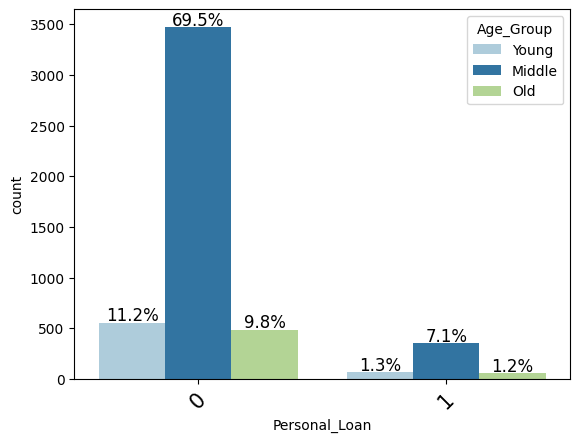

In [ ]:
# Plot categorical values
labeled_barplot(data,'Personal_Loan','Age_Group',True)

- ~ 70% of Middle aged customers have no personal loan
- The percentage of young people holding loan is also less.
- The bank would be reluctant to give loan to old people.
- From this intial EDA we can explore more on Young and Middle aged customers

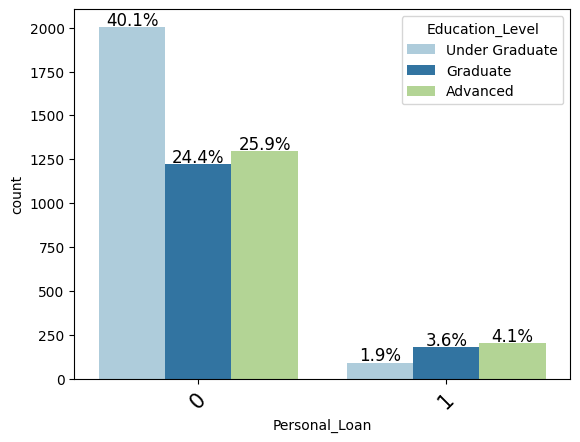

In [ ]:
# Plot categorical values
labeled_barplot(data,'Personal_Loan','Education_Level',True)

- Under graduated customers hold less percentage of personal loan
- Advanced/ Professional customers hold ~ 4.1 % of loans

### Data Preprocessing for model building
- Personal_Loan has positive correlation with Income, CCAvg and CD_Account
- We will investigate this further

In [ ]:
### function to plot distributions wrt target

def dist_plot_wrt_target(data, predictor, target):
    """
    Distribution plot
    data: dataframe
    predictor :independent feature
    target: target column

    """
    # Set Figsize and subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()
    total=data[data[target]==1].count()[0]
    # Plot for where target is zero
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="green",
        stat="density",
    )

   # Plot for where target is one
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    # Boxplot for where target
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    # Boxplot without outliers
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

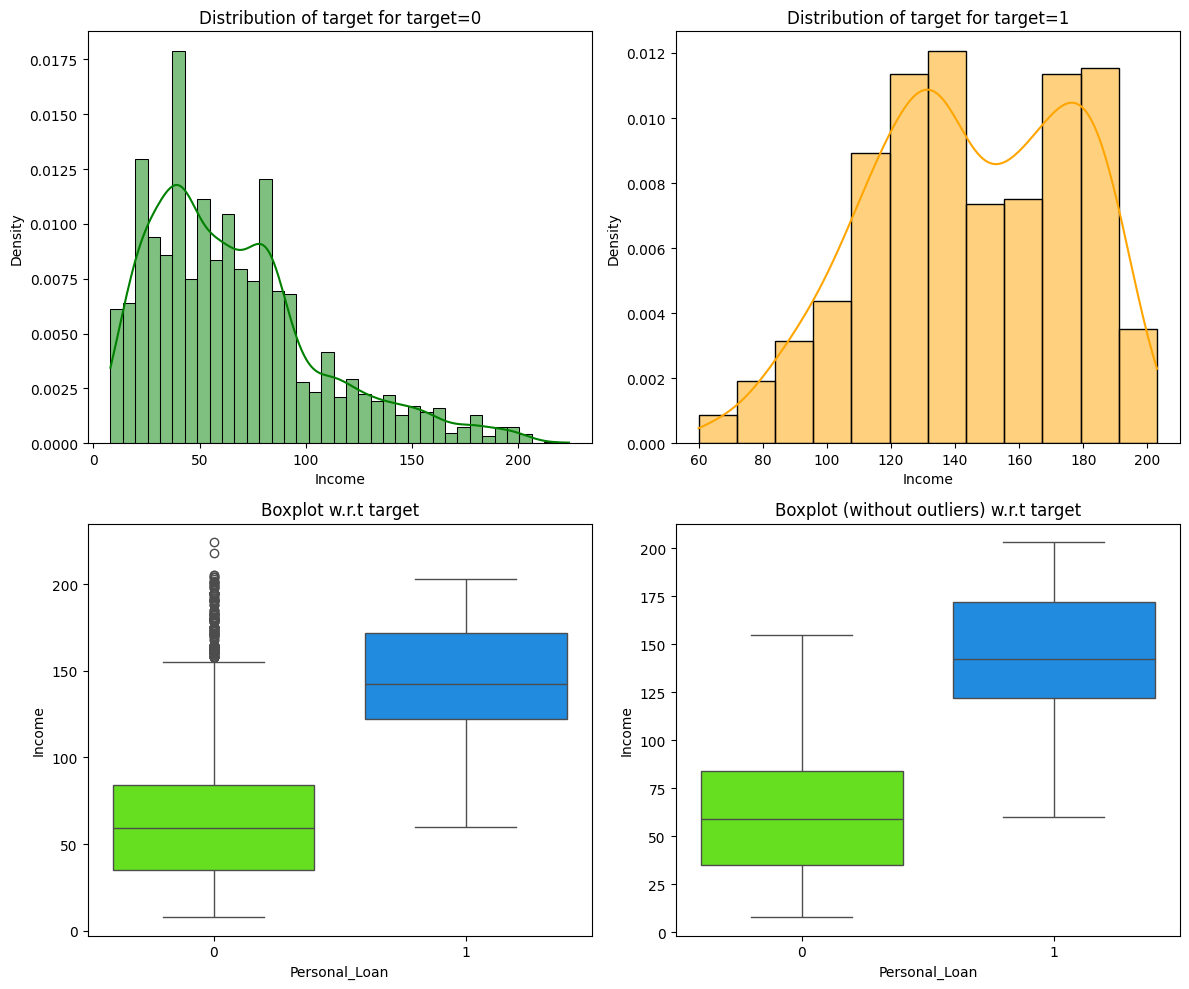

In [ ]:
# Distribution of Income vs Personal Loan
dist_plot_wrt_target(data, "Income", "Personal_Loan")

### Personal Loan Status

In [ ]:
print("Number of Customers having personal loan=",data[data['Personal_Loan']==1].count()[0])
print("Number of Customers donot have personal loan=",data[data['Personal_Loan']==0].count()[0])

Number of Customers having personal loan= 480
Number of Customers donot have personal loan= 4520


- It is clear that customers having high income hold personal loans
- There are 4520 customers who donot hold any personal loans,  a few of them are rich.

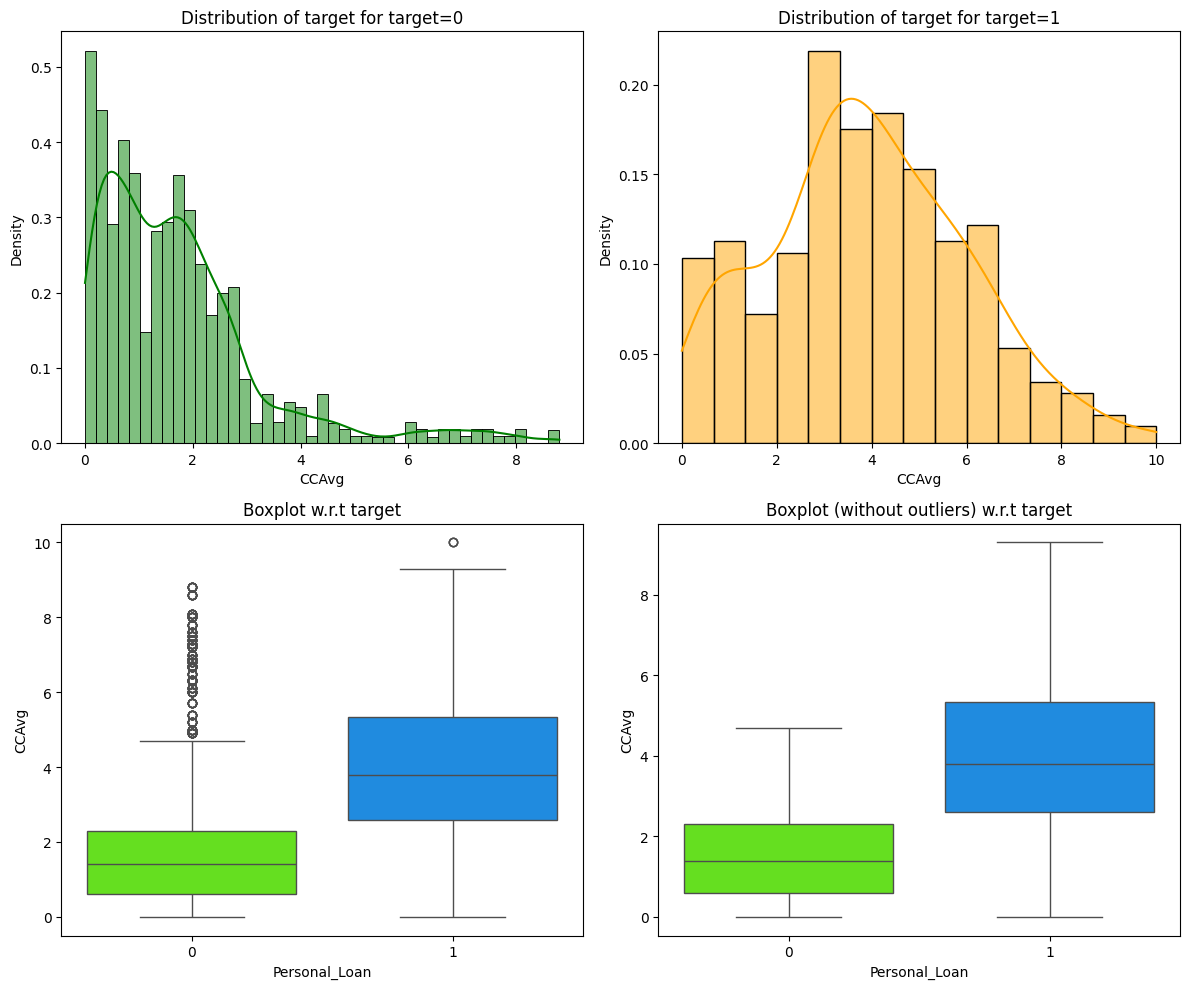

In [ ]:
# Distribution of CCAvg vs Personal Loan
dist_plot_wrt_target(data, "CCAvg", "Personal_Loan")

- From the plot, it is evident that customers who spend more on credit cards hold personal loan
- A lot of outliers in the customer group who donot hold personal loan

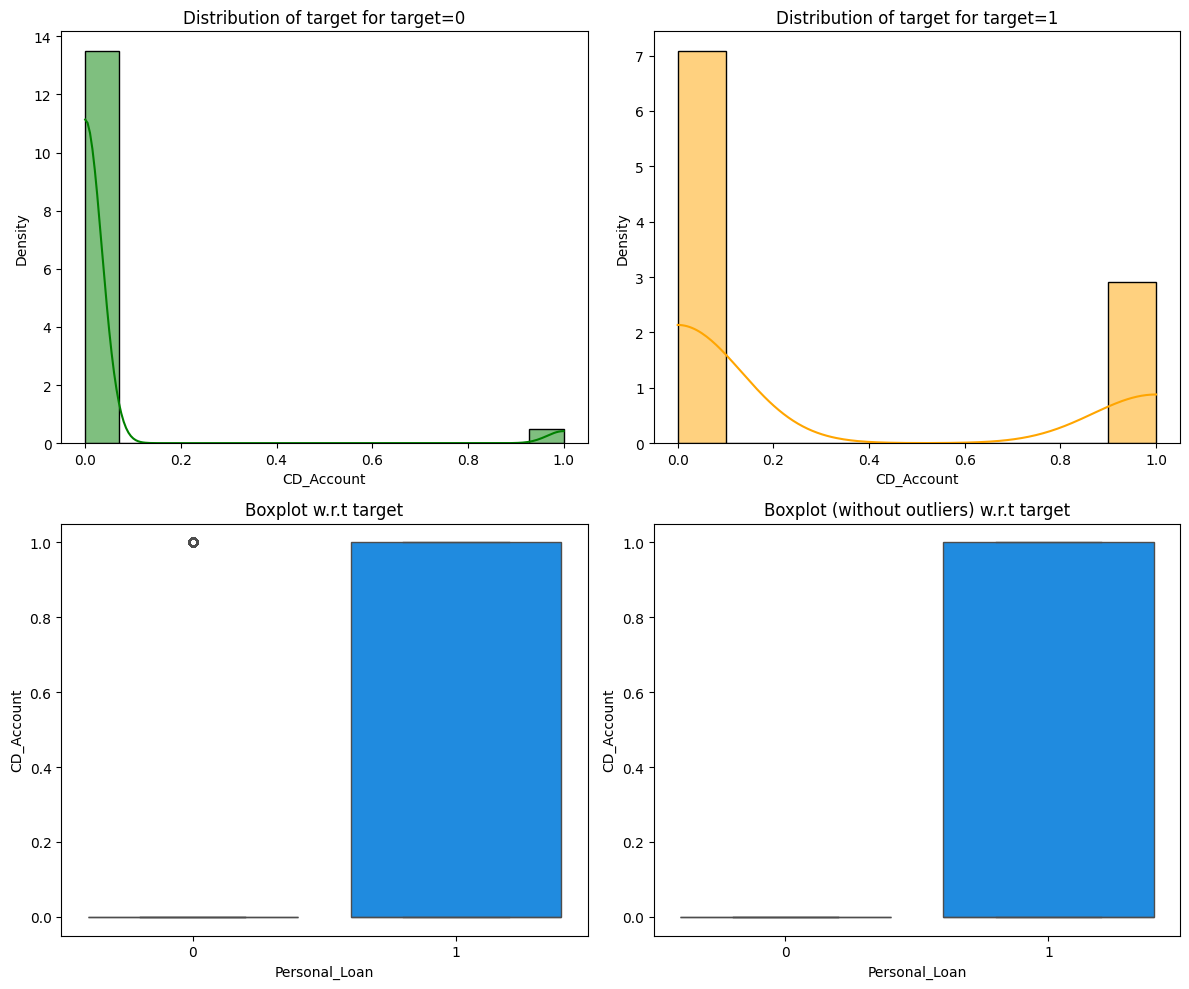

In [ ]:
# Distribution of CCAvg vs Personal Loan
dist_plot_wrt_target(data, "CD_Account", "Personal_Loan")

In [ ]:
print("Number of customers having both deposit and Persoanl Loan is",data[(data['Personal_Loan']==1) & (data['CD_Account'	]==1)].count()[0])
print("Number of customers having  a deposit and not having a Persoanl Loan is",data[(data['Personal_Loan']==0) & (data['CD_Account'	]==1)].count()[0])

Number of customers having both deposit and Persoanl Loan is 140
Number of customers having  a deposit and not having a Persoanl Loan is 162


- 162 customers who hold certificate of deposit donot hold a personal loan.

In [ ]:
# Function to create stacked  bar plot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    # Number of unique predictor
    count = data[predictor].nunique()
    # Sort by the last class in target
    sorter = data[target].value_counts().index[-1]
    # Cross-tab: counts
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
   # Cross-tab: row-wise % (for stacked bar)
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)

    # Plot
    ax = tab.plot(kind='bar', stacked=True, figsize=(count + 5, 6))
    # Format legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title=target)
    plt.ylabel('Percentage (%)')
    plt.xlabel(predictor)
    plt.xticks(rotation=45)

    # Add percentage labels in each segment
    for container in ax.containers:
        ax.bar_label(container,label_type='center',fmt='%.2f%%',               # Format as percentage
            fontsize=10,
            fontweight='bold'
        )

    plt.tight_layout()
    plt.show()

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


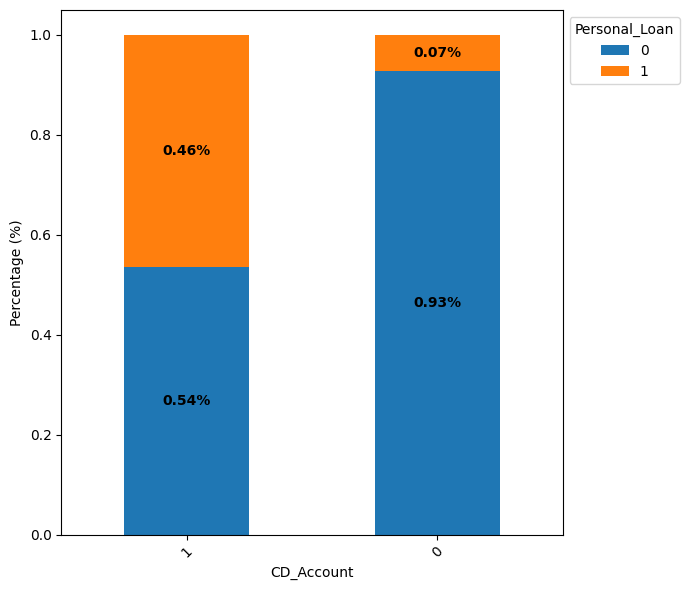

In [ ]:
# Stacked bar plot on CD_Account
stacked_barplot(data, "CD_Account", "Personal_Loan")

- ~ 54% of customers who have certificate of deposit donot hold any loan
- ~ 93% of customers who donot have certificate od deposit donot hold any loan

Personal_Loan       0    1   All
Education_Level                 
All              4520  480  5000
Advanced         1296  205  1501
Graduate         1221  182  1403
Under Graduate   2003   93  2096
------------------------------------------------------------------------------------------------------------------------


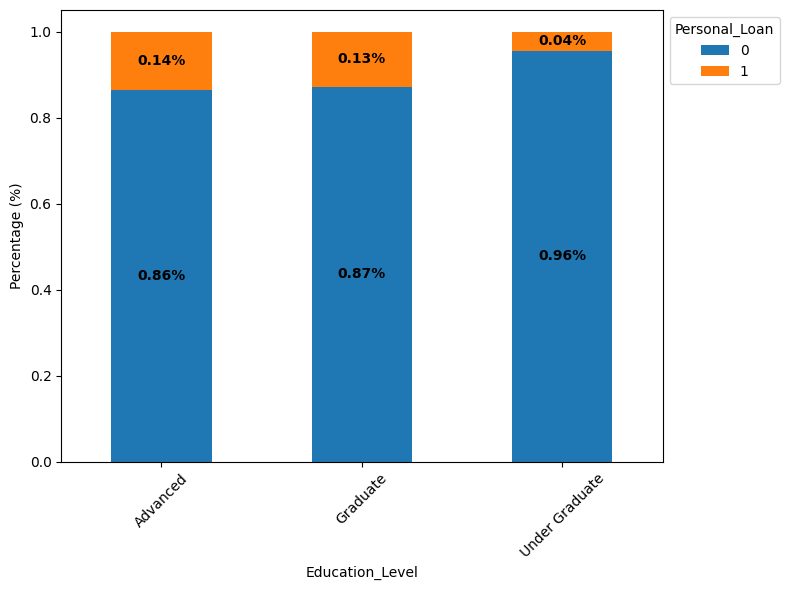

In [ ]:
# Stacked bar plot on Education Level and Personal Loan
stacked_barplot(data, "Education_Level", "Personal_Loan")

- Around 4% of Undergraduated customers hold personal Loan

### Bivariate using Boxplot
#### Detect Outliers

In [ ]:
# Removing target variable and is ValidExp from the array
num_cols_without_target=num_cols
num_cols_without_target.pop(8)
num_cols_without_target


['Age',
 'Experience',
 'Income',
 'ZIPCode',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

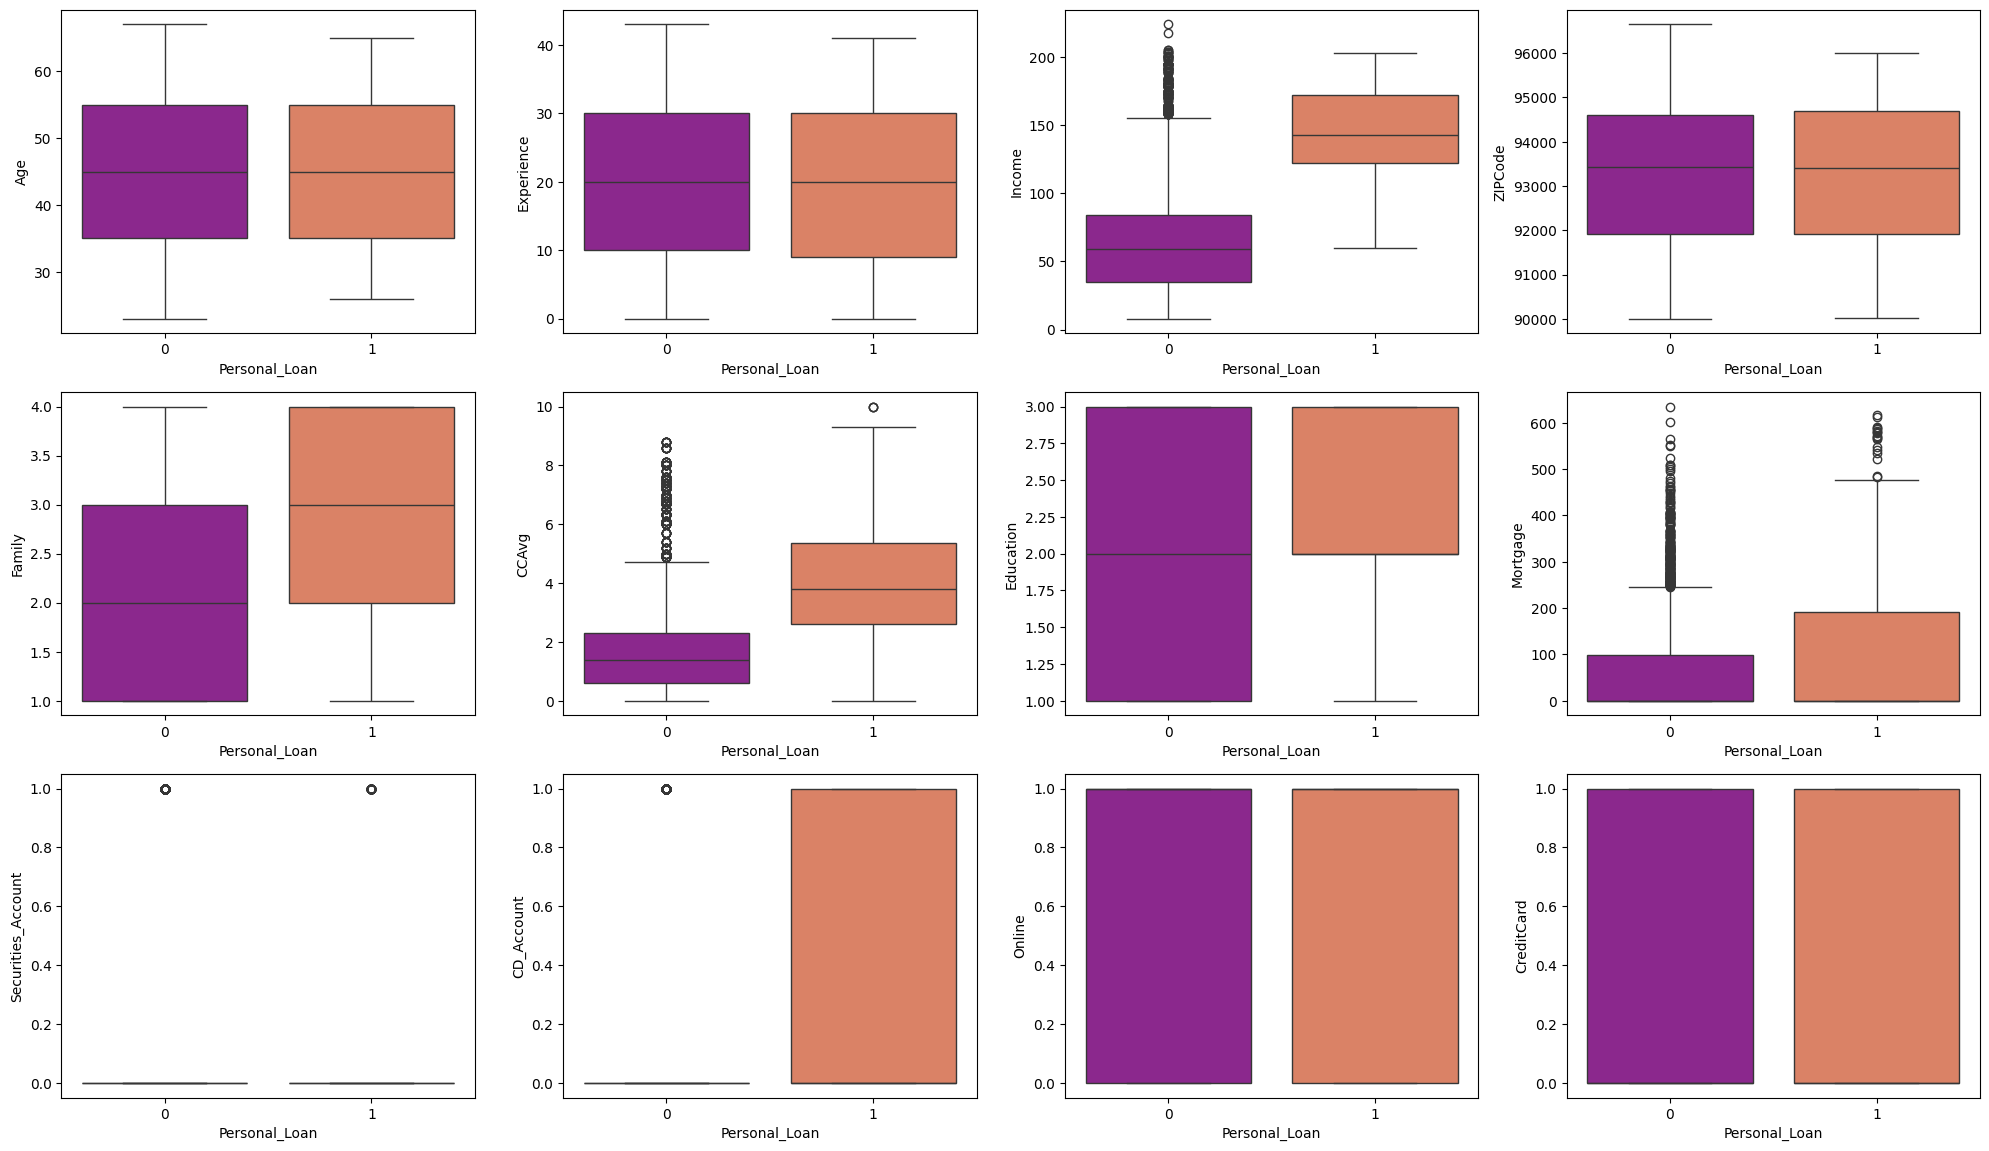

In [ ]:
j=1
plt.figure(figsize=(20, 15))
for i,x in enumerate(num_cols_without_target):
  plt.subplot(4,4,j)
  if x != 'Personal_Loan':
    sns.boxplot(x=data['Personal_Loan'],
                y=data[x],
                palette='plasma')
  j=j+1
plt.tight_layout()

- There are outliers in Income, CCAvg and Mortgage
- We don't remove outliers as they are valid information
- Family with on average more than 2 persons hold personal loans


### Data Preparation for Modeling

In [ ]:
# Choose all features except Personal Loan
X = data.drop(["Personal_Loan",'HasLoan'], axis=1)
# Choose target variable
Y = data["Personal_Loan"]

# # Generate dummies for categorical variables
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)
X



Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0     25.0         1.0    49.0  91107.0     4.0    1.6        1.0       0.0   
1     45.0        19.0    34.0  90089.0     3.0    1.5        1.0       0.0   
2     39.0        15.0    11.0  94720.0     1.0    1.0        1.0       0.0   
3     35.0         9.0   100.0  94112.0     1.0    2.7        2.0       0.0   
4     35.0         8.0    45.0  91330.0     4.0    1.0        2.0       0.0   
...    ...         ...     ...      ...     ...    ...        ...       ...   
4995  29.0         3.0    40.0  92697.0     1.0    1.9        3.0       0.0   
4996  30.0         4.0    15.0  92037.0     4.0    0.4        1.0      85.0   
4997  63.0        39.0    24.0  93023.0     2.0    0.3        3.0       0.0   
4998  65.0        40.0    49.0  90034.0     3.0    0.5        2.0       0.0   
4999  28.0         4.0    83.0  92612.0     3.0    0.8        1.0       0.0   

      Securities_Account  CD_Account  Online  CreditCard  Age_Group_Old  \
0                    1.0         0.0     0.0         0.0            0.0   
1                    1.0         0.0     0.0         0.0            0.0   
2                    0.0         0.0     0.0         0.0            0.0   
3                    0.0         0.0     0.0         0.0            0.0   
4                    0.0         0.0     0.0         1.0            0.0   
...                  ...         ...     ...         ...            ...   
4995                 0.0         0.0     1.0         0.0            0.0   
4996                 0.0         0.0     1.0         0.0            0.0   
4997                 0.0         0.0     0.0         0.0            1.0   
4998                 0.0         0.0     1.0         0.0            1.0   
4999                 0.0         0.0     1.0         1.0            0.0   

      Age_Group_Young  Education_Level_Graduate  \
0                 1.0                       0.0   
1                 0.0                       0.0   
2                 0.0                       0.0   
3                 0.0                       1.0   
4                 0.0                       1.0   
...               ...                       ...   
4995              1.0                       0.0   
4996              1.0                       0.0   
4997              0.0                       0.0   
4998              0.0                       1.0   
4999              1.0                       0.0   

      Education_Level_Under Graduate  
0                                1.0  
1                                1.0  
2                                1.0  
3                                0.0  
4                                0.0  
...                              ...  
4995                             0.0  
4996                             1.0  
4997                             0.0  
4998                             0.0  
4999                             1.0  

[5000 rows x 16 columns]

In [ ]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)
# Checking the distribution of data
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 16)
Shape of test set :  (1500, 16)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


### Model Building

In [ ]:

# defining a function to compute different metrics to check performance of a classification model built using sklearn
# find recall, precision and F1 score etc
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# Function to define confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

- **Recall is important in this scenario as we need FN value as smaller as possible because not the bank donot want to loose not even one customer**.

### Decision Tree (default)

In [ ]:
# Basic decision tree model
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

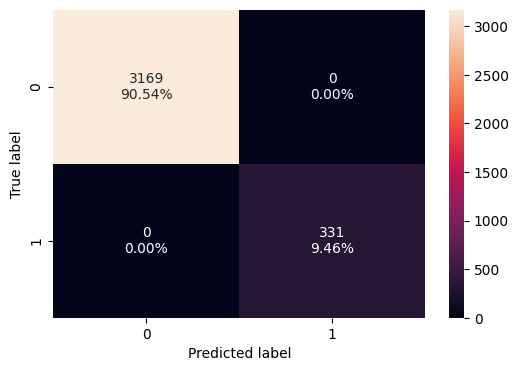

In [ ]:
#Plot confusion matrix on train set with TP (True Positive), TN(True Negative), FP(False Positive) and FN(False Negative).
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
# Plot Accuracy,	Recall,	Precision and	F1 on train data
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

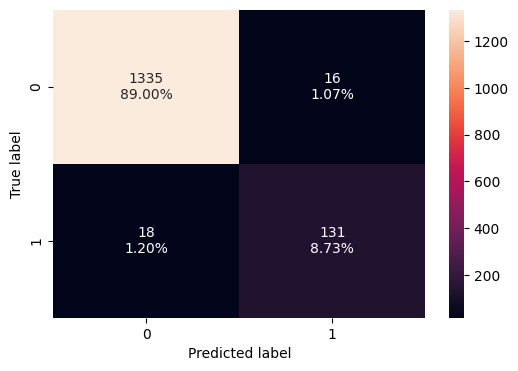

In [ ]:
#Plot confusion matrix on test set with TP (True Positive), TN(True Negative), FP(False Positive) and FN(False Negative).
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
# Plot Accuracy,	Recall,	Precision and	F1 on test data
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

Accuracy    Recall  Precision        F1
0  0.977333  0.879195   0.891156  0.885135

- Accuracy, Recall and Precision is 100% on train data
- But the model performs different on unseen data, model seems to be overfitting
- We will also try to build the model with weights to improve the model performance

### Decision Tree (with class_weights)


* class_weight is a hyperparameter for the decision tree classifier

In [ ]:
# Model with class weights
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

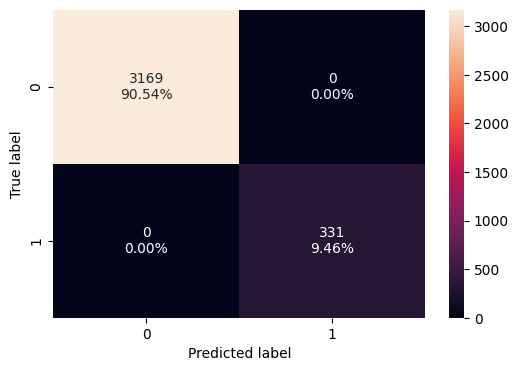

In [ ]:
#Plot confusion matrix on train set with TP (True Positive), TN(True Negative), FP(False Positive) and FN(False Negative).
confusion_matrix_sklearn(model1, X_train, y_train)

In [ ]:
# Plot Accuracy,	Recall,	Precision and	F1 on train data
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

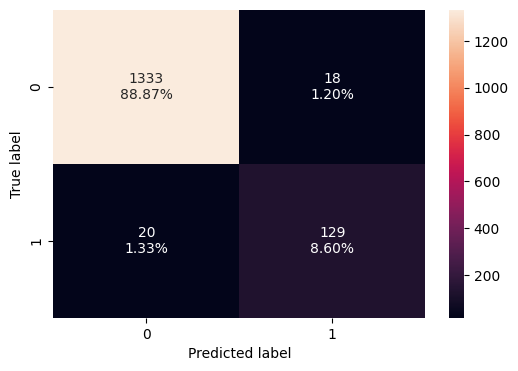

In [ ]:
#Plot confusion matrix on test set with TP (True Positive), TN(True Negative), FP(False Positive) and FN(False Negative).
confusion_matrix_sklearn(model1, X_test, y_test)

In [ ]:
# Plot Accuracy,	Recall,	Precision and	F1 on test data
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.974667  0.865772   0.877551  0.871622

- The accuracy, recall, precision and f1-score are still 100% on train data
- Regarding test set, there is a decrease in F1 score, Precision and Recall in test set
- Model is able to perfectly classify all the data points on the training set.
- Still the model seems to be overfitting on unseen data, we will try to generate a perfect model


## Let's use pruning techniques to try and reduce overfitting.

### Decision Tree (Pre-pruning)

* To improve the model  performance and robustness effective hyperparameter tuning is needed
* The following code loops for hyperparameter tuning iterates over predefined parameter values to identify the best model based on the metric of choice (recall score).

In [ ]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [ ]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

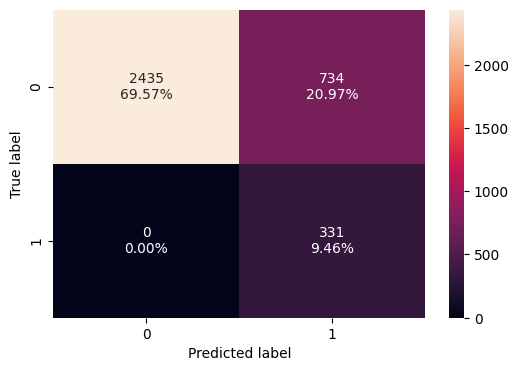

In [ ]:
#Plot confusion matrix on train set with TP (True Positive), TN(True Negative), FP(False Positive) and FN(False Negative).
confusion_matrix_sklearn(model2, X_train, y_train)

In [ ]:
# Plot Accuracy,	Recall,	Precision and	F1 on train data
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision        F1
0  0.790286     1.0   0.310798  0.474212

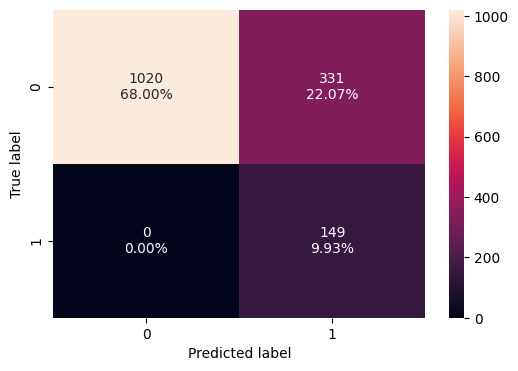

In [ ]:
#Plot confusion matrix on test set with TP (True Positive), TN(True Negative), FP(False Positive) and FN(False Negative).
confusion_matrix_sklearn(model2, X_test, y_test)

In [ ]:
# Plot Accuracy,	Recall,	Precision and	F1 on test data
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision        F1
0  0.779333     1.0   0.310417  0.473768

- The recall score is 100%.
- Accuracy of the model has gone down slightly hence the model generalizes well
- But 100% on recall is good, in this scenario, as we only look at recall value
- Model shows decent accuracy

### Plot Decision Tree

In [ ]:
# choose X Features and find important Features
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

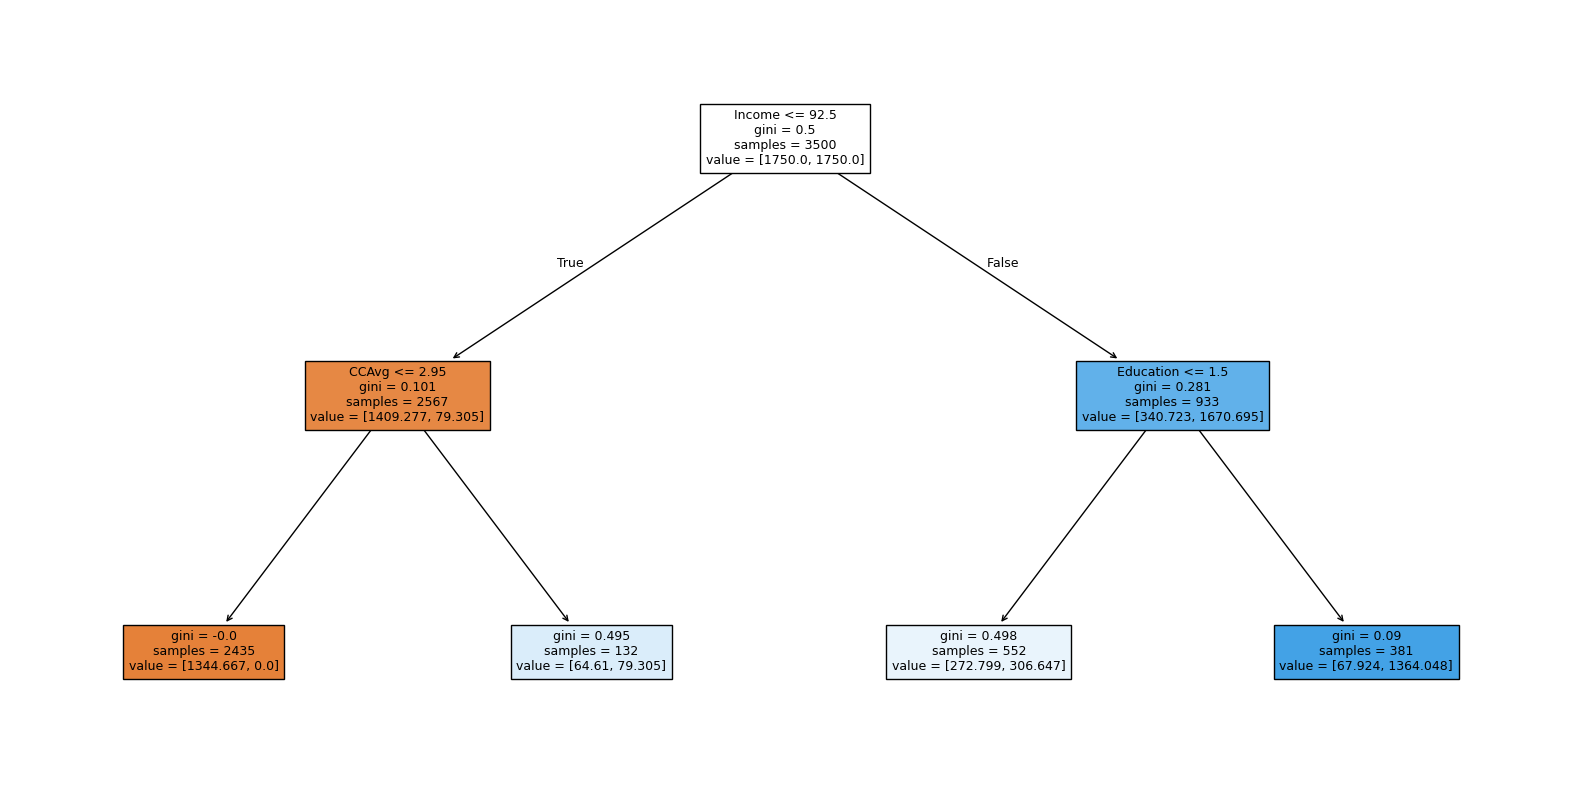

In [ ]:
# Plot Decision tree

# Set Figsize
plt.figure(figsize=(20, 10))
# Plot tree
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


- The root node is Income, and it will be the most significant feature

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- weights: [272.80, 306.65] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [67.92, 1364.05] class: 1



Using the above extracted decision rules we can make interpretations from the decision tree model like:

- A customer is most likely to take a personal loan if he  has  Moderate-high income > (\$ 92.50 ).
-  A customer is most likely to take a personal loan if has income <= $92 and CCAvg >2.95



In [ ]:
importances = model2.feature_importances_
importances

array([0.        , 0.        , 0.82007181, 0.        , 0.        ,
       0.06262835, 0.11729984, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

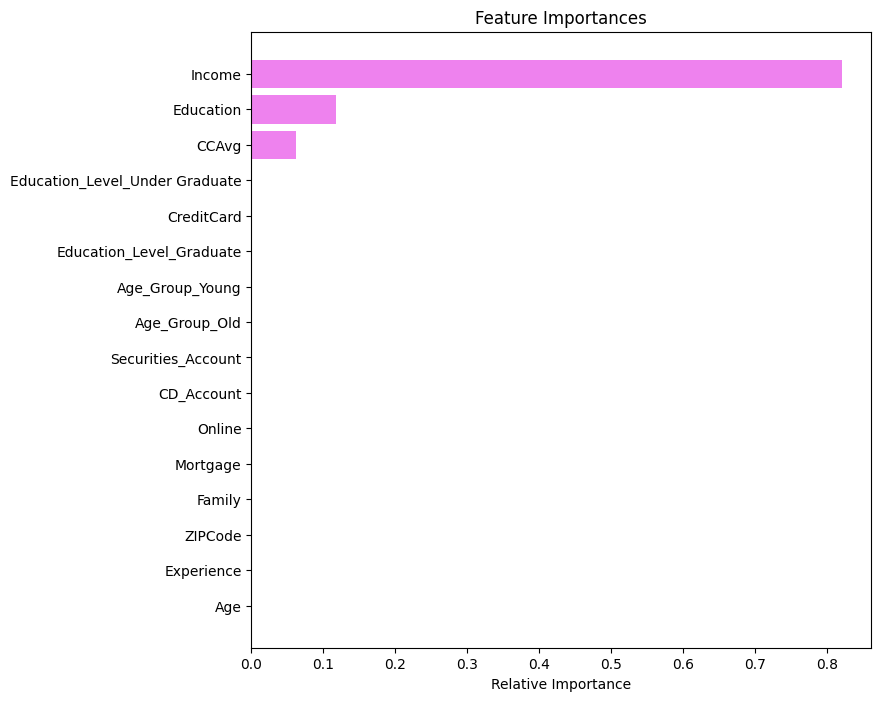

In [ ]:
# importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- In the pre-pruned decision tree, Income and Education and CCAvg are the most important features.

### Decision Tree (Post pruning)

- Another way to manage a tree's size is through cost-complexity pruning.
 -  This pruning method in `DecisionTreeClassifier` is specified by the ``ccp_alpha`` cost complexity parameter.
 -  The number of nodes pruned increases with larger values of ``ccp_alpha``.
 -  Only the impact of ``ccp_alpha`` on regularizing the trees and how to choose the ideal ``ccp_alpha`` value are demonstrated here.

In [ ]:
# Initialize the tree and compute pruning path
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
# View ccp_alpha and corresponding impurities in each node
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -7.000943e-15
1   4.729571e-19 -7.000470e-15
2   5.255079e-19 -6.999945e-15
3   1.051016e-18 -6.998894e-15
4   1.051016e-18 -6.997843e-15
5   3.573454e-18 -6.994269e-15
6   1.257806e-17 -6.981691e-15
7   1.524700e-04  3.049400e-04
8   1.537634e-04  6.124667e-04
9   1.561475e-04  9.247618e-04
10  1.568682e-04  1.238498e-03
11  1.574681e-04  1.553435e-03
12  2.761014e-04  2.105637e-03
13  2.857143e-04  2.677066e-03
14  2.922634e-04  2.969329e-03
15  3.101371e-04  3.279466e-03
16  3.130853e-04  3.905637e-03
17  3.516163e-04  6.015335e-03
18  3.708542e-04  8.611314e-03
19  4.867023e-04  9.098016e-03
20  5.839354e-04  9.681952e-03
21  7.689471e-04  1.045090e-02
22  1.153258e-03  1.391067e-02
23  1.343845e-03  1.525452e-02
24  1.416204e-03  1.667072e-02
25  1.431094e-03  1.953291e-02
26  1.693744e-03  2.292040e-02
27  1.981730e-03  2.688386e-02
28  2.150414e-03  2.903427e-02
29  2.375809e-03  3.141008e-02
30  3.344493e-03  3.475457e-02
31  3.602932e-03  4.196044e-02
32  3.729690e-03  4.569013e-02
33  4.920880e-03  5.061101e-02
34  1.007808e-02  7.076717e-02
35  2.255792e-02  9.332509e-02
36  5.564782e-02  2.046207e-01
37  2.953793e-01  5.000000e-01

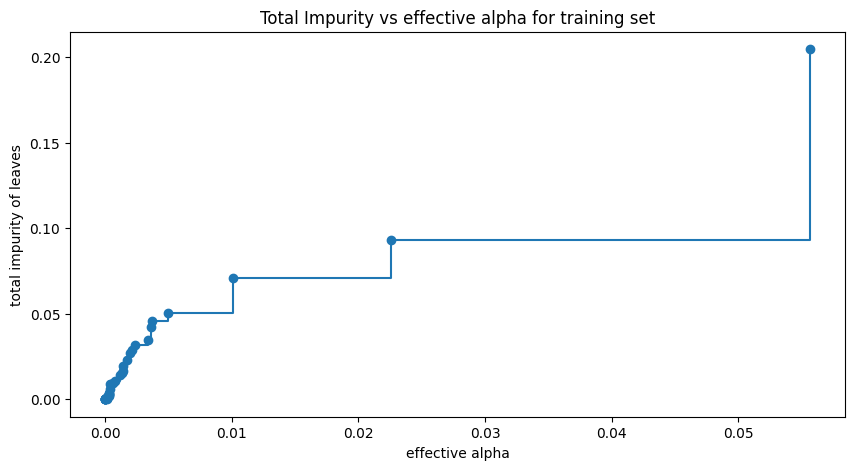

In [ ]:
# Plot alpha values and impurities
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- The effective alphas are then used to train a decision tree. The alpha value that prunes the whole tree, leaving just one node in the tree clfs[-1], is the last value in ccp_alphas.


In [ ]:
# View number of nodes in the last tree
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992323


- It is the trivial tree with only one
node, hence we remove the last elelment.

### Plot tree depth vs alpha

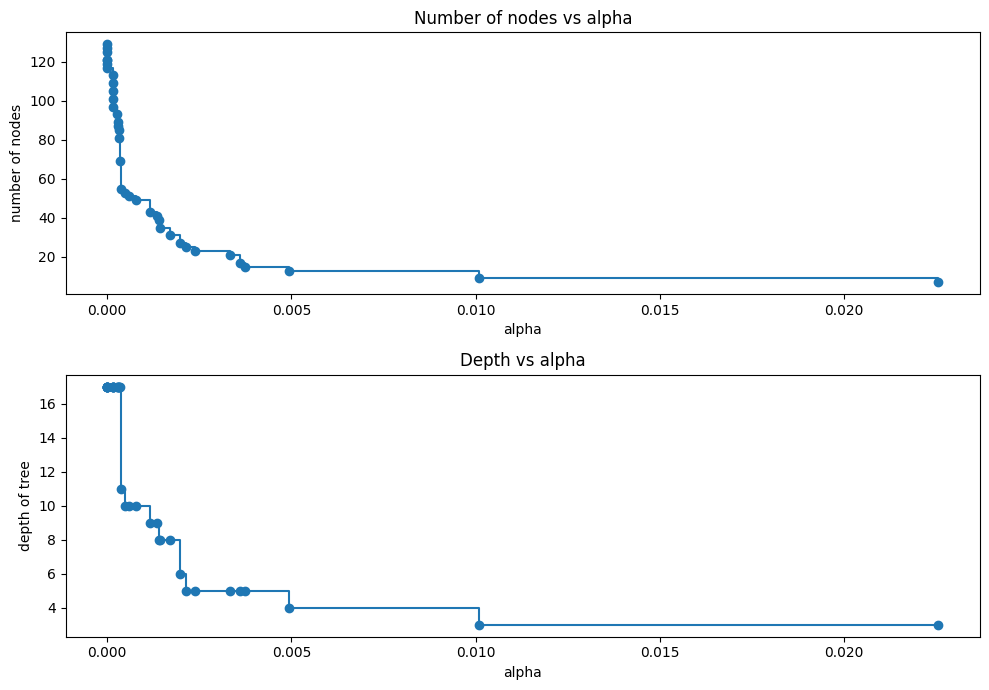

In [ ]:
# Plot tree depth vs alpha
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
# Find recall values on train set
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
# Find recall values on test set
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
# save scores
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

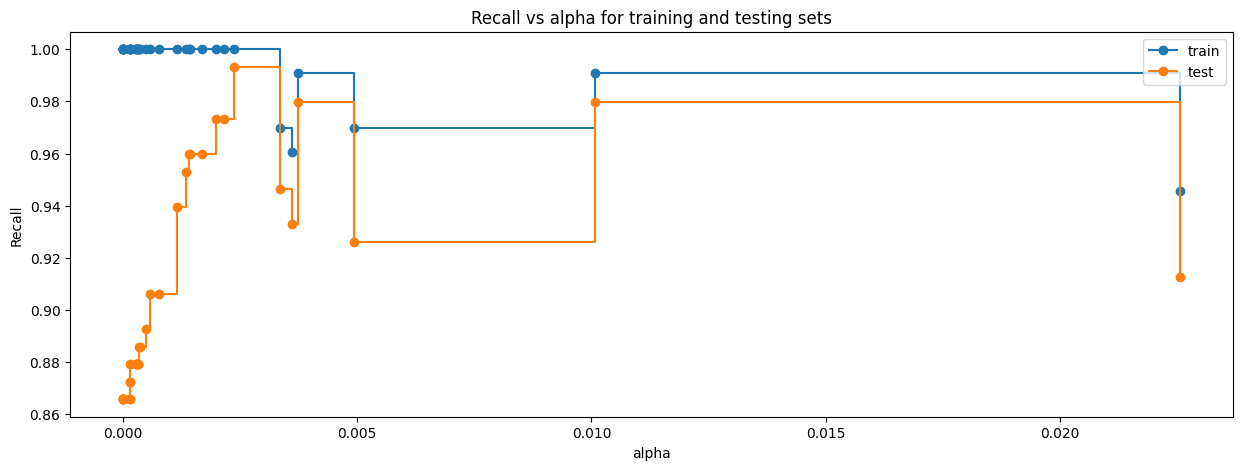

In [ ]:
# Plot tree alpha vs recall
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

- The best model is where recall value difference is very less and stable, which is alpha value between ~0.01 and ~0.023

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.002375808619774645),
                       class_weight='balanced', random_state=1)


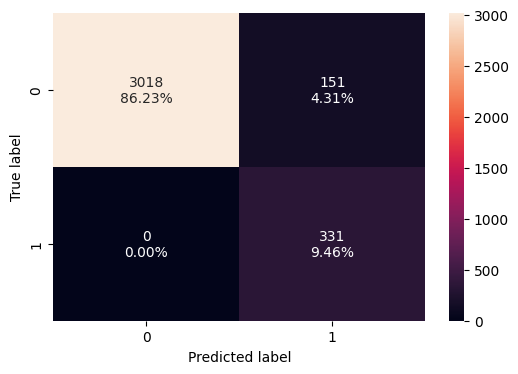

In [ ]:
#Plot confusion matrix on train set with TP (True Positive), TN(True Negative), FP(False Positive) and FN(False Negative).
model4 = best_model
confusion_matrix_sklearn(model4, X_train, y_train)

In [ ]:
# Plot Accuracy,	Recall,	Precision and	F1 on train data
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision        F1
0  0.956857     1.0   0.686722  0.814268

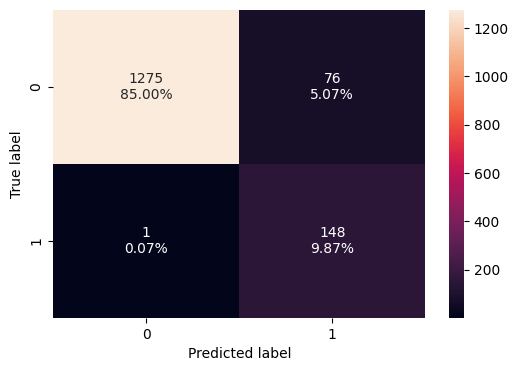

In [ ]:
#Plot confusion matrix on test set with TP (True Positive), TN(True Negative), FP(False Positive) and FN(False Negative).
confusion_matrix_sklearn(model4, X_test, y_test)

In [ ]:
# Plot Accuracy,	Recall,	Precision and	F1 on test data
decision_tree_post_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_post_test

Accuracy    Recall  Precision        F1
0  0.948667  0.993289   0.660714  0.793566

- In the post-pruned tree also, the model is giving a slight difference in recall in test and trained set.
- Still a mild overfitting seems in recall factor
- Accuracy has decreased slightly and a decent recall score on test set hence we can count this as a good model

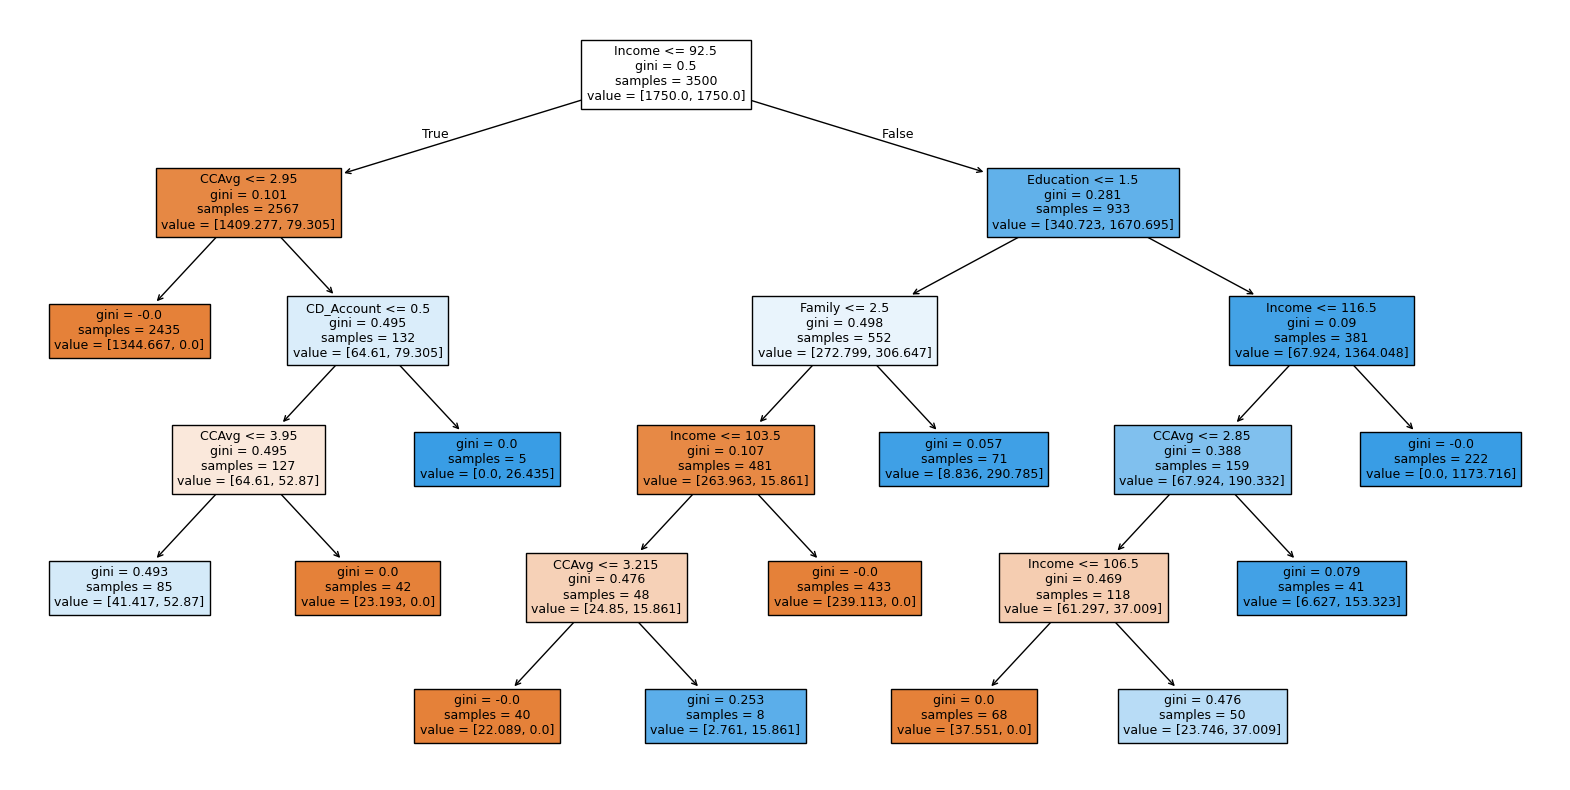

In [ ]:
# Plot Pruned tree
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model4, feature_names=feature_names, show_weights=True))


|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [8.84, 290.79] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   | 

- We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree. The rules are as follows
    * (Income ≤ 92.50) AND (CCAvg > 2.95) AND (CD_Account ≤ 0.50) AND (CCAvg ≤ 3.95)
    * (Income ≤ 92.50) AND (CCAvg > 2.95) AND (CD_Account > 0.50)
    * (Income > 92.50) AND (Education ≤ 1.50) AND (Family ≤ 2.50) AND (Income ≤ 103.50) AND (CCAvg > 3.21)
    * (Income > 92.50) AND (Education ≤ 1.50) AND (Family > 2.50)
    * (Income > 92.50) AND (Education > 1.50) AND (Income ≤ 116.50) AND (CCAvg ≤ 2.85) AND (Income > 106.50)

    * (Income > 92.50) AND (Education > 1.50) AND (Income ≤ 116.50) AND (CCAvg > 2.85)
    * (Income > 92.50) AND (Education > 1.50) AND (Income > 116.50)


In [ ]:
# Find important Features
importances = model4.feature_importances_
indices = np.argsort(importances)

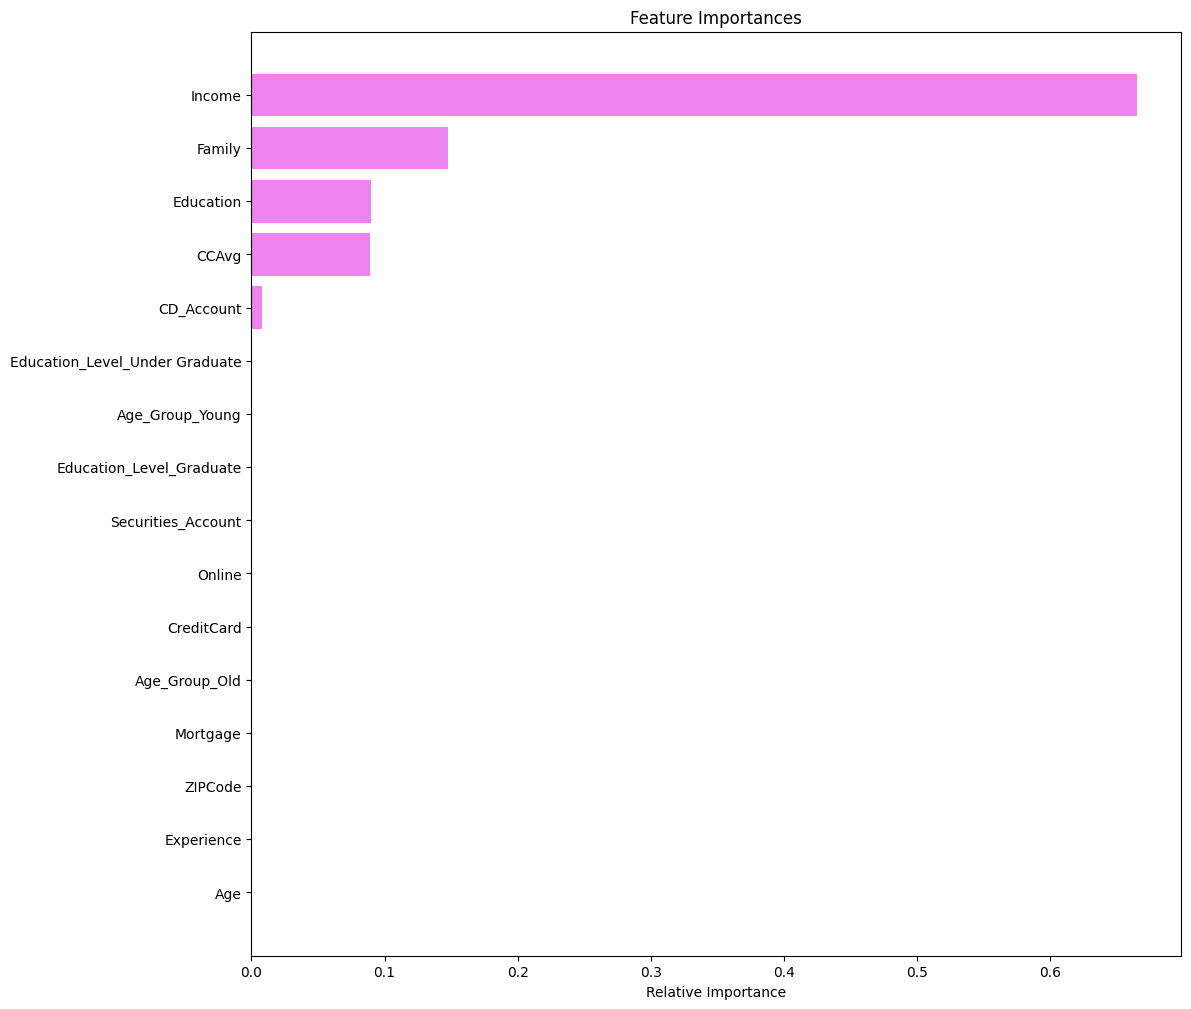

In [ ]:
# Plot which are important features
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Income and Family are the most important feature in the post pruned tree similar to pre pruned tree
- CD_Account has got a little significance in post pruned tree when compared to pre pruned tree model

## Comparison of Models and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                               1.0                              1.0   
Recall                                 1.0                              1.0   
Precision                              1.0                              1.0   
F1                                     1.0                              1.0   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.790286                      0.956857  
Recall                        1.000000                      1.000000  
Precision                     0.310798                      0.686722  
F1                            0.474212                      0.814268

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                          0.977333                         0.974667   
Recall                            0.879195                         0.865772   
Precision                         0.891156                         0.877551   
F1                                0.885135                         0.871622   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.779333                      0.948667  
Recall                        1.000000                      0.993289  
Precision                     0.310417                      0.660714  
F1                            0.473768                      0.793566

* Decision tree models with post-pruning is giving same recall scores on  training and but pre-pruned has high recall score on test sets.
* Therefore, we can choose the pre-pruned tree as our best model.

## Conclusion and Observations
- The pre-pruned model built can be used to predict if a customer is going to take Personal Loan or not and can correctly identify 100% of the customer behaviour.

- Income, Family, Education, CCAvg and CDAccount are the most important variables in predicting whether a customer will take personal loan or not.

- From the decision tree, it has been observed that the  customer is most likely to take a personal loan if he  has  Moderate-high income > (\$ 92.50 ) and has Education level as Graduated or Advanced.

- The bank can look into the following features to take a decision.
  - High-income graduate-level customers
  - Customers with high credit card spending
  - Those who already have a CD account
  - Large families in high-income group

- The bank should use more data for the analysis to get more reliable results, and add some additional features such as EMI amount of those who have loan, whether the customer already has loan with another bank, etc


# Clustering

### Data Preprocessing for clustering to find the target group
### Scaling data using z-score scaling


In [ ]:
# Choose numerical columns
num_cols=data.select_dtypes(exclude='object').columns.to_list()

In [ ]:
# Initialize the StandardScaler object
scaler=StandardScaler()
# Execute scaling
scaled_data=pd.DataFrame(scaler.fit_transform(data[num_cols]))
# Display the scaled data
scaled_data.head()

0         1         2         3         4         5         6   \
0 -1.774417 -1.676408 -0.538229 -1.172217  1.397414 -0.193385 -1.049078   
1 -0.029524 -0.099404 -0.864109 -1.750863  0.525991 -0.250611 -1.049078   
2 -0.552992 -0.449849 -1.363793  0.881465 -1.216855 -0.536736 -1.049078   
3 -0.901970 -0.975517  0.569765  0.535869 -1.216855  0.436091  0.141703   
4 -0.901970 -1.063129 -0.625130 -1.045461  1.397414 -0.536736  0.141703   

         7         8         9        10        11        12  
0 -0.555524 -0.325875  2.928915 -0.25354 -1.216618 -0.645314  
1 -0.555524 -0.325875  2.928915 -0.25354 -1.216618 -0.645314  
2 -0.555524 -0.325875 -0.341423 -0.25354 -1.216618 -0.645314  
3 -0.555524 -0.325875 -0.341423 -0.25354 -1.216618 -0.645314  
4 -0.555524 -0.325875 -0.341423 -0.25354 -1.216618  1.549632

In [ ]:
# Statistical summary of scaled data
scaled_data.describe().T

count          mean     std       min       25%       50%       75%  \
0   5000.0 -2.131628e-18  1.0001 -1.948906 -0.901970 -0.029524  0.842923   
1   5000.0  9.450218e-17  1.0001 -1.764019 -0.887906 -0.011792  0.864321   
2   5000.0  1.449507e-16  1.0001 -1.428969 -0.755483 -0.212348  0.526315   
3   5000.0  1.260148e-15  1.0001 -1.798610 -0.715212  0.152189  0.817803   
4   5000.0  1.001865e-16  1.0001 -1.216855 -1.216855 -0.345432  0.525991   
5   5000.0 -6.394885e-17  1.0001 -1.108987 -0.708412 -0.250611  0.321641   
6   5000.0  2.557954e-17  1.0001 -1.049078 -1.049078  0.141703  1.332484   
7   5000.0 -5.613288e-17  1.0001 -0.555524 -0.555524 -0.555524  0.437558   
8   5000.0 -4.973799e-17  1.0001 -0.325875 -0.325875 -0.325875 -0.325875   
9   5000.0 -2.273737e-17  1.0001 -0.341423 -0.341423 -0.341423 -0.341423   
10  5000.0  2.131628e-17  1.0001 -0.253540 -0.253540 -0.253540 -0.253540   
11  5000.0  4.121148e-17  1.0001 -1.216618 -1.216618  0.821951  0.821951   
12  5000.0  7.105427e-18  1.0001 -0.645314 -0.645314 -0.645314  1.549632   

         max  
0   1.889859  
1   2.003268  
2   3.263712  
3   1.979074  
4   1.397414  
5   4.613525  
6   1.332484  
7   5.688108  
8   3.068659  
9   2.928915  
10  3.944146  
11  0.821951  
12  1.549632

### Dimensionality Reduction and Visualization using t-SNE
#### Reduction to two dimensions


In [ ]:
# Function to find t-SNE metrics
def tsne_init_def(n_components,n_jobs,random_state,perplexity=0):
    # n_components=2 ; specify the dimension needed
    # n_jobs=- 2 ; specifies to use all but one processor core for parallel computation to speed up the process
    # Initializing the t-SNE object
    if perplexity==0:
      tsne=TSNE(n_components=n_components,n_jobs=n_jobs,random_state=random_state) # Without perplexity
    else:
      tsne=TSNE(n_components=n_components,perplexity=perplexity,n_jobs=n_jobs,random_state=random_state) # With perplexity
    # Perform dimensionality reduction on scaled data
    tsne_reduced_data=tsne.fit_transform(scaled_data) # fits the t-SNE model to the data and transform it to the specified number in the distribution
    if n_components==2: # For 2 dimensional
      # Create a DataFrame with 2 Features
      tsne_d_data=pd.DataFrame(tsne_reduced_data,columns=['Feature 1','Feature 2'])
      return tsne_d_data
    elif n_components==3: # For 3 dimentional
      # Create a dataframe with 3 features
      tsne_d_data=pd.DataFrame(tsne_reduced_data,columns=['Feature 1','Feature 2','Feature 3'])
      return tsne_d_data


In [ ]:
# Call tsne function
tsne_2d_data=tsne_init_def(2,-2,RS)
# list 5 rows
tsne_2d_data.head()


Feature 1  Feature 2
0  48.947723 -32.448788
1  50.513809 -33.336849
2  14.910017 -30.862598
3  11.561581 -54.239033
4  30.692142  15.726208

[]

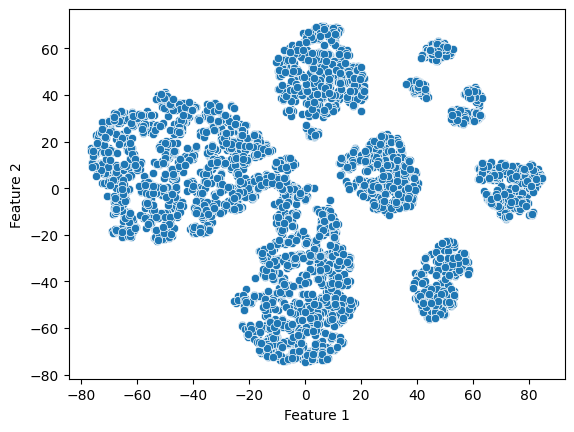

In [ ]:
# Plot the features
sns.scatterplot(data=tsne_2d_data,x='Feature 1',y='Feature 2')
plt.plot()

- We can clearly see 5 or 6 clusters from the scatter plot
- Let's try different values for perplexity

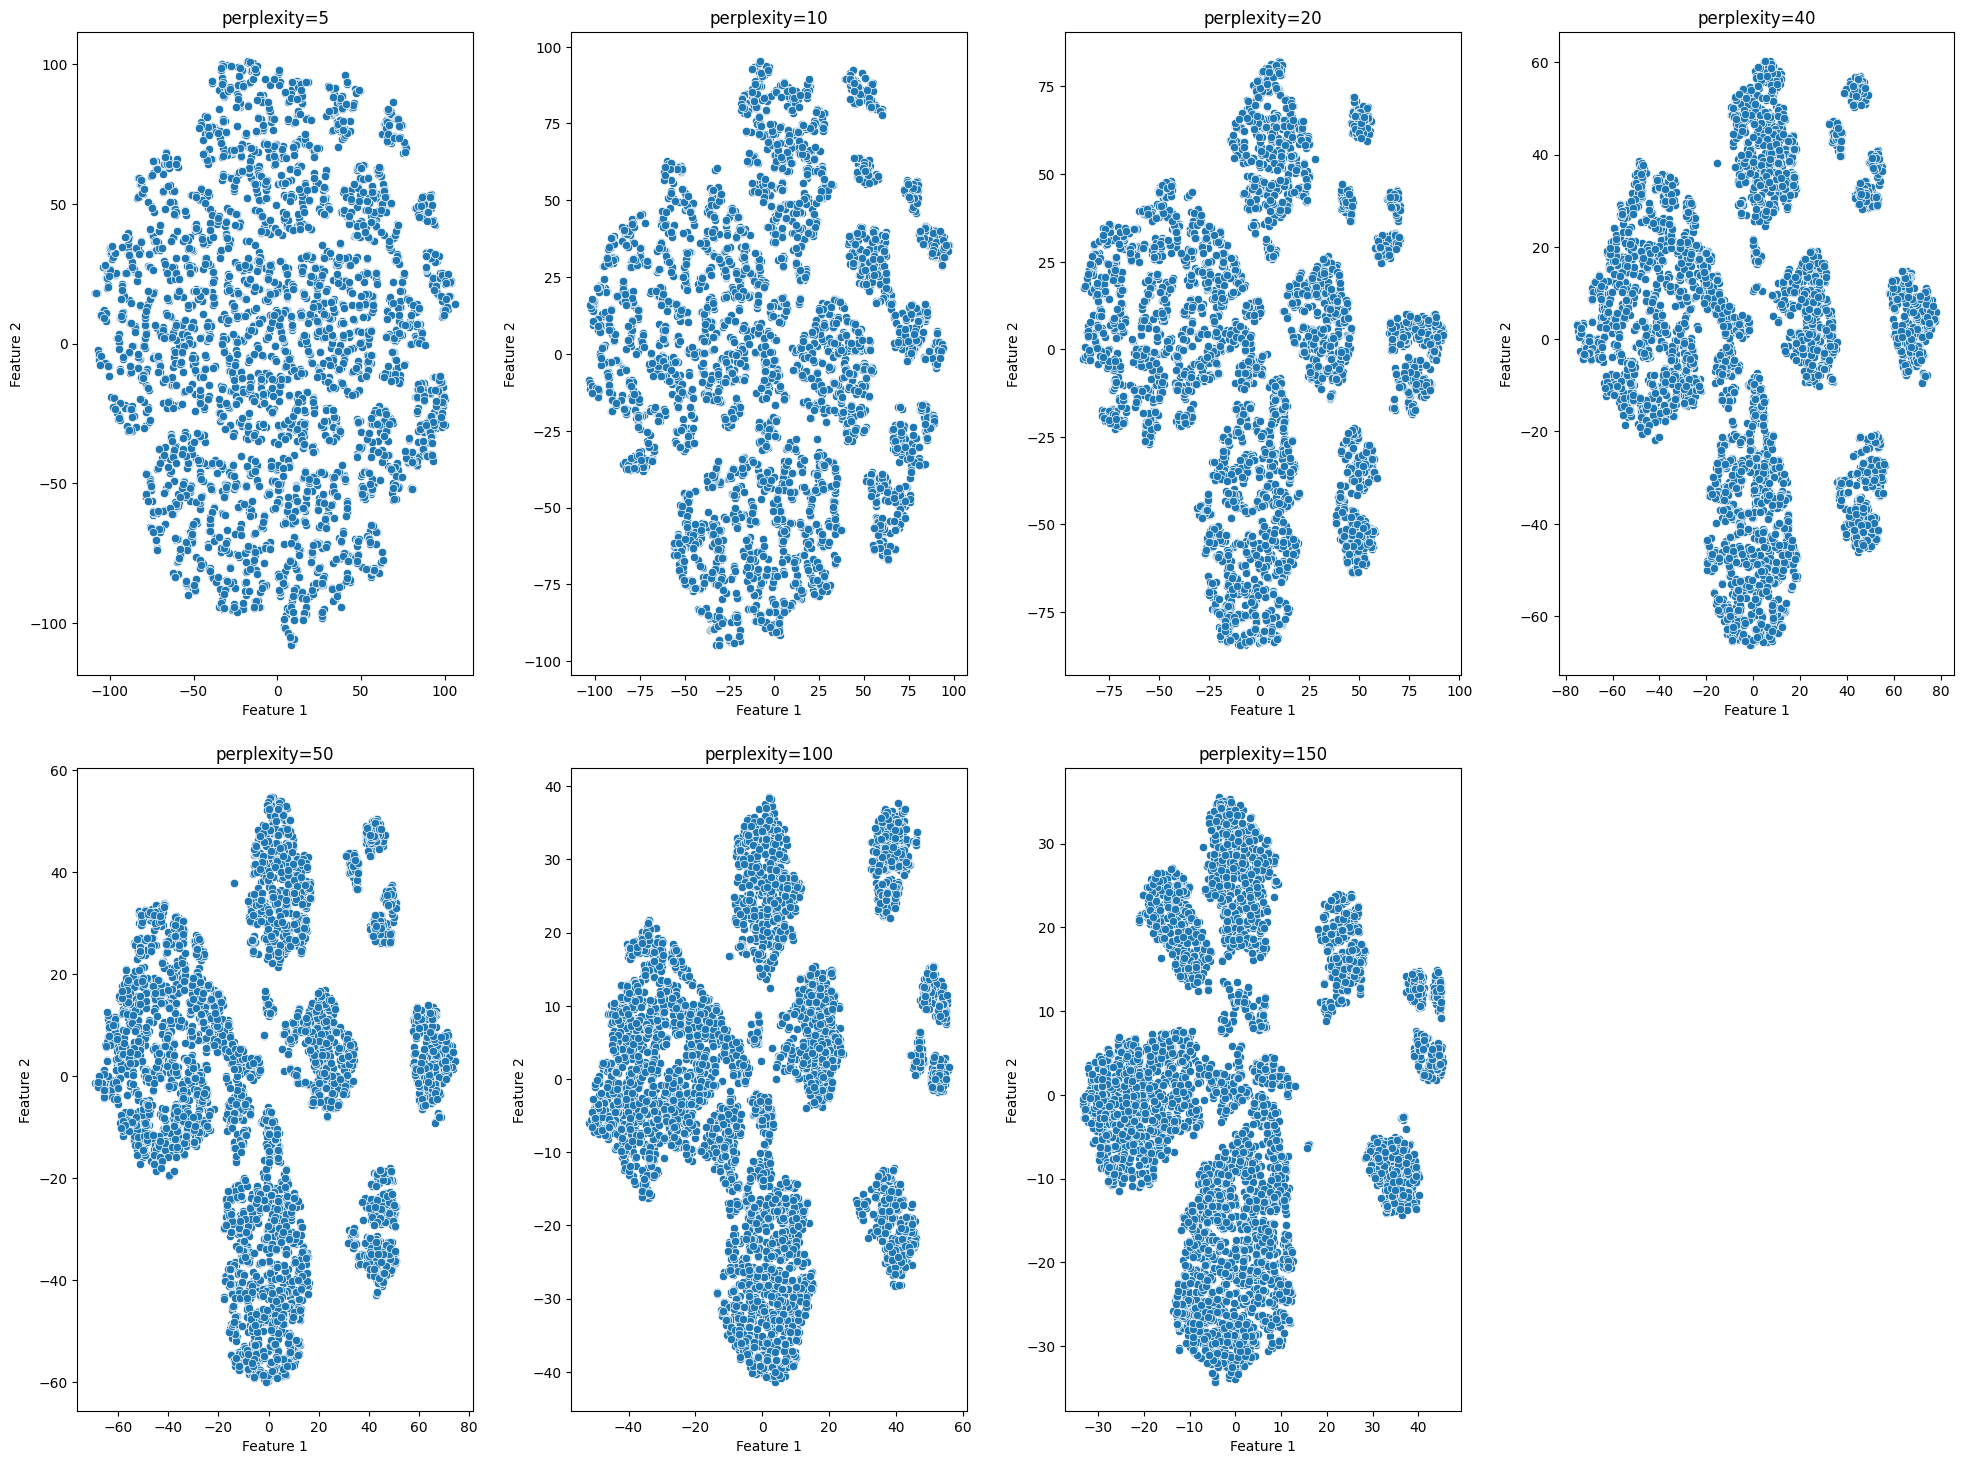

In [ ]:
# Define the list of perplexity values to iterate over
perplexities = [5, 10, 20, 40, 50,100,150]

plt.figure(figsize=(20, 15))

# Iterate over each perplexity value
for i in range(len(perplexities)):
    # Initiate TSNE with the current perplexity value
    red_data_df =tsne_init_def(2,-2,RS,perplexities[i])
    # Adjust the subplot grid to 2x4
    plt.subplot(2, 4, i + 1)

    plt.title("perplexity=" + str(perplexities[i]))    # setting plot title
    sns.scatterplot(data=red_data_df, x="Feature 1", y="Feature 2")
    plt.tight_layout(pad=2)

plt.show()

- The data seems to exhibit a good visual separation for perplexity=50, and we can roughly see 5 clusters in it.
- We'll go ahead with this perplexity value.

In [ ]:
# Perplexity =150
tsne_2d_data = tsne_init_def(2,-2,RS,50)
tsne_2d_data.head()

Feature 1  Feature 2
0  41.725422 -26.931322
1  43.694801 -25.834877
2   8.363999 -26.015774
3  12.477188 -47.875591
4  23.287153  10.209023

[]

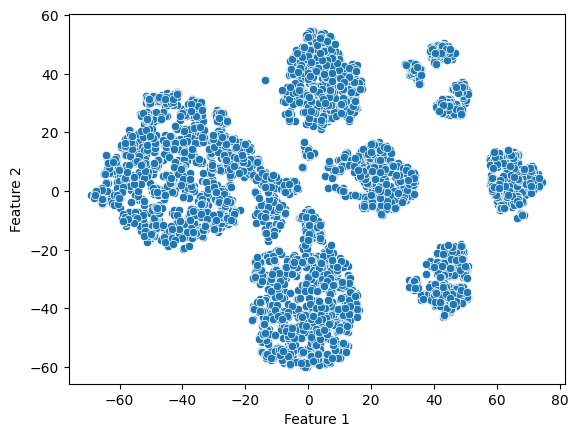

In [ ]:
# Plot the features
sns.scatterplot(data=tsne_2d_data,x='Feature 1',y='Feature 2')
plt.plot()

### Reduction to three dimension
#### We will use perplexity = 50

In [ ]:
# Call function with first parameter as 3
tsne_3d_data = tsne_init_def(3,-2,RS,50)


In [ ]:
# View the first five rows
tsne_3d_data.head()

Feature 1  Feature 2  Feature 3
0   4.835345  -7.252031  15.547476
1   4.127349  -9.159475  15.588527
2   2.572984  -2.613556  -9.529105
3  10.513633  -2.069546 -11.980509
4  13.422992  -3.521539   3.919958

In [ ]:
# plotting a 3D scatterplot

fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3')
fig.show()

### K Means Clustering
#### Model building with K= 4

In [ ]:
# create a K-means object
n_clusters = 4
Kmeans_4 = KMeans(n_clusters=n_clusters, random_state=RS)

# fitting the model to the data
Kmeans_4.fit(scaled_data)

KMeans(n_clusters=4, random_state=0)

In [ ]:
# Calculate the WCSS (Within-Cluster Sum of Squares)
wcss_k4 = Kmeans_4.inertia_

# Print the WCSS
print("WCSS for K={} is {}".format(n_clusters, wcss_k4))

WCSS for K=4 is 47908.25942317924


In [ ]:
# Calculate the silhouette score
sil_score_k4 = silhouette_score(scaled_data, Kmeans_4.labels_)

# Print the silhouette score
print("Silhouette score for K={} is {}".format(n_clusters, sil_score_k4))

Silhouette score for K=4 is 0.10400775482079815


In [ ]:
# Assigning cluster labels to the tsne_2d_data DataFrame
tsne_2d_data['Clusters'] = Kmeans_4.labels_
tsne_2d_data.head(10)

Feature 1  Feature 2  Clusters
0  41.725422 -26.931322         3
1  43.694801 -25.834877         0
2   8.363999 -26.015774         0
3  12.477188 -47.875591         3
4  23.287153  10.209023         3
5 -36.369606  21.883598         3
6 -39.889538   4.458096         2
7  19.314690   1.717672         0
8 -36.080242  17.475420         3
9  67.498940   0.057904         1

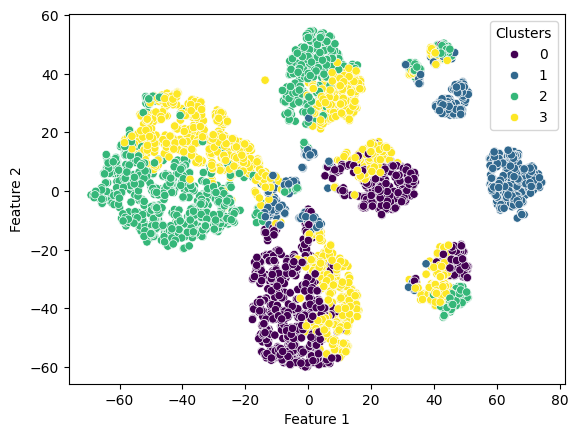

In [ ]:
sns.scatterplot(tsne_2d_data, x='Feature 1', y='Feature 2', hue='Clusters', palette='viridis');

In [ ]:
# Assigning cluster labels to the tsne_3d_data DataFrame
tsne_3d_data['Clusters'] = Kmeans_4.labels_
tsne_3d_data.head()

Feature 1  Feature 2  Feature 3  Clusters
0   4.835345  -7.252031  15.547476         3
1   4.127349  -9.159475  15.588527         0
2   2.572984  -2.613556  -9.529105         0
3  10.513633  -2.069546 -11.980509         3
4  13.422992  -3.521539   3.919958         3

In [ ]:
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3', color='Clusters')
fig.show()

### Finding Optimal K

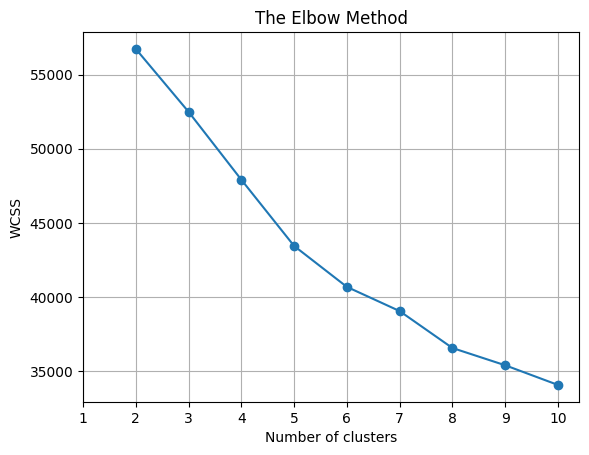

In [ ]:
# calculate WCSS for a range of K values
wcss_list = []

# Iterate over a range of K values from 2 to 10
for i in range(2, 11):
    # Create a KMeans clusterer object with current K value
    clusterer = KMeans(n_clusters=i, random_state=RS)

    # Fit the clusterer to the scaled data
    clusterer.fit(scaled_data)

    # Append the inertia (WCSS) to the wcss_list
    wcss_list.append(clusterer.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(2, 11), wcss_list, marker='o')
plt.title('The Elbow Method')  # Set the title of the plot
plt.xlabel('Number of clusters')  # Label the x-axis
plt.ylabel('WCSS')  # Label the y-axis
plt.xticks(range(1, 11))  # Set the x-ticks from 1 to 10
plt.grid(True)  # Enable grid lines on the plot
plt.show()  # Display the plot

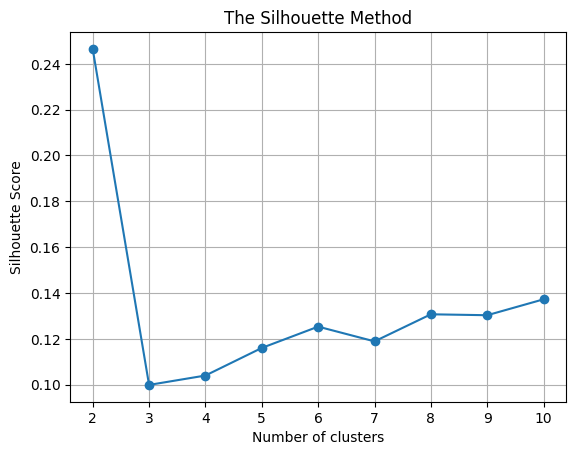

In [ ]:
# calculate Silhouette Scores for a range of K values
sil_score = []

# Iterate over a range of K values from 2 to 10
for i in range(2, 11):
    # Create a KMeans clusterer object with current K value
    clusterer = KMeans(n_clusters=i, random_state=RS)

    # Fit the clusterer to the scaled data
    clusterer.fit(scaled_data)

    # Calculate Silhouette Score
    score = silhouette_score(scaled_data, clusterer.labels_)

    # Append the Silhouette Score to the sil_score list
    sil_score.append(score)

# Plot the Silhouette Scores against the number of clusters
plt.plot(range(2, 11), sil_score, marker='o')
plt.title('The Silhouette Method')  # Set the title of the plot
plt.xlabel('Number of clusters')  # Label the x-axis
plt.ylabel('Silhouette Score')  # Label the y-axis
plt.xticks(range(2, 11))  # Set the x-ticks from 2 to 10
plt.grid(True)  # Enable grid lines on the plot
plt.show()  # Display the plot

### Model building with optimal K value
- K=5 is been chosen after comparing Elbow method curve and silhouette scores

In [ ]:
# create a K-means object
n_clusters = 5
Kmeans_5 = KMeans(n_clusters=n_clusters, random_state=RS)

# fitting the model to the data
Kmeans_5.fit(scaled_data)

KMeans(n_clusters=5, random_state=0)

In [ ]:
# Assigning cluster labels to the tsne_2d_data DataFrame
tsne_2d_data['Clusters'] = Kmeans_5.labels_
tsne_2d_data.head()

Feature 1  Feature 2  Clusters
0  41.725422 -26.931322         3
1  43.694801 -25.834877         0
2   8.363999 -26.015774         3
3  12.477188 -47.875591         3
4  23.287153  10.209023         3

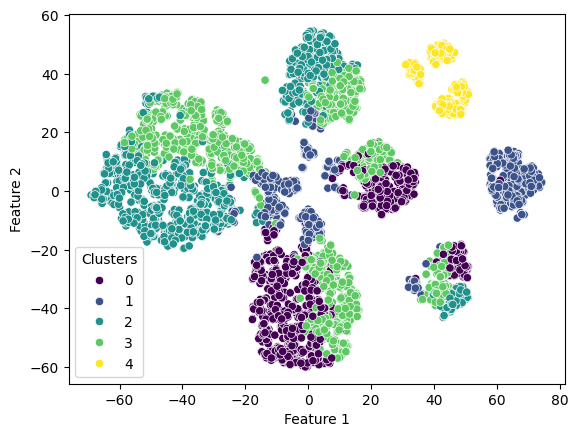

In [ ]:
sns.scatterplot(tsne_2d_data, x='Feature 1', y='Feature 2', hue='Clusters', palette='viridis');

In [ ]:
# Assigning cluster labels to the tsne_3d_data DataFrame
tsne_3d_data['Clusters'] = Kmeans_5.labels_
tsne_3d_data.head()

Feature 1  Feature 2  Feature 3  Clusters
0   4.835345  -7.252031  15.547476         3
1   4.127349  -9.159475  15.588527         0
2   2.572984  -2.613556  -9.529105         3
3  10.513633  -2.069546 -11.980509         3
4  13.422992  -3.521539   3.919958         3

In [ ]:
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3', color='Clusters')
fig.show()

### Cluster Profiling

In [ ]:
# Add the cluster labels back to the DataFrame
data['Clusters'] = Kmeans_5.labels_

# Display the DataFrame with original values
data.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

  Age_Group Education_Level HasLoan  Clusters  
0     Young  Under Graduate      No         3  
1    Middle  Under Graduate      No         0  
2    Middle  Under Graduate      No         3  
3    Middle        Graduate      No         3  
4    Middle        Graduate      No         3

Clusters
3    30.84
2    27.24
0    21.66
1    14.22
4     6.04
Name: proportion, dtype: float64 



[]

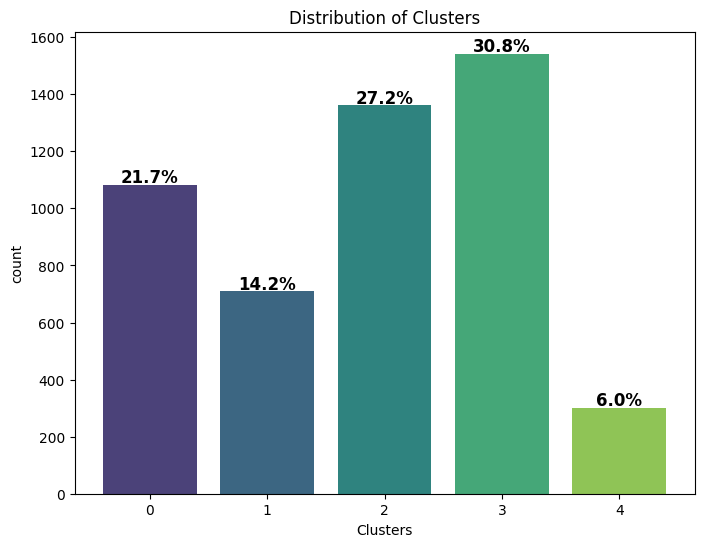

In [ ]:
# checking the distribution of the categories in Clusters
print(100*data['Clusters'].value_counts(normalize=True), '\n')
total=data.shape[0]

# plotting the count plot for clusters
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='Clusters', palette='viridis')
ax.set_title('Distribution of Clusters')
for idx, p in enumerate(ax.patches):
  # percentage of each class of the category
  label = "{:.1f}%".format(100 * p.get_height() / total)
  # set the width of the plot
  x = p.get_x() + p.get_width() / 2
  # set the height of the plot
  y = p.get_height()
  # annotate the percentage on the bar
  ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
            fontsize=12, fontweight='bold'
        )

plt.plot()

- Majoriity of customers belong to Cluster 3
- Cluster 4 has least number of customers

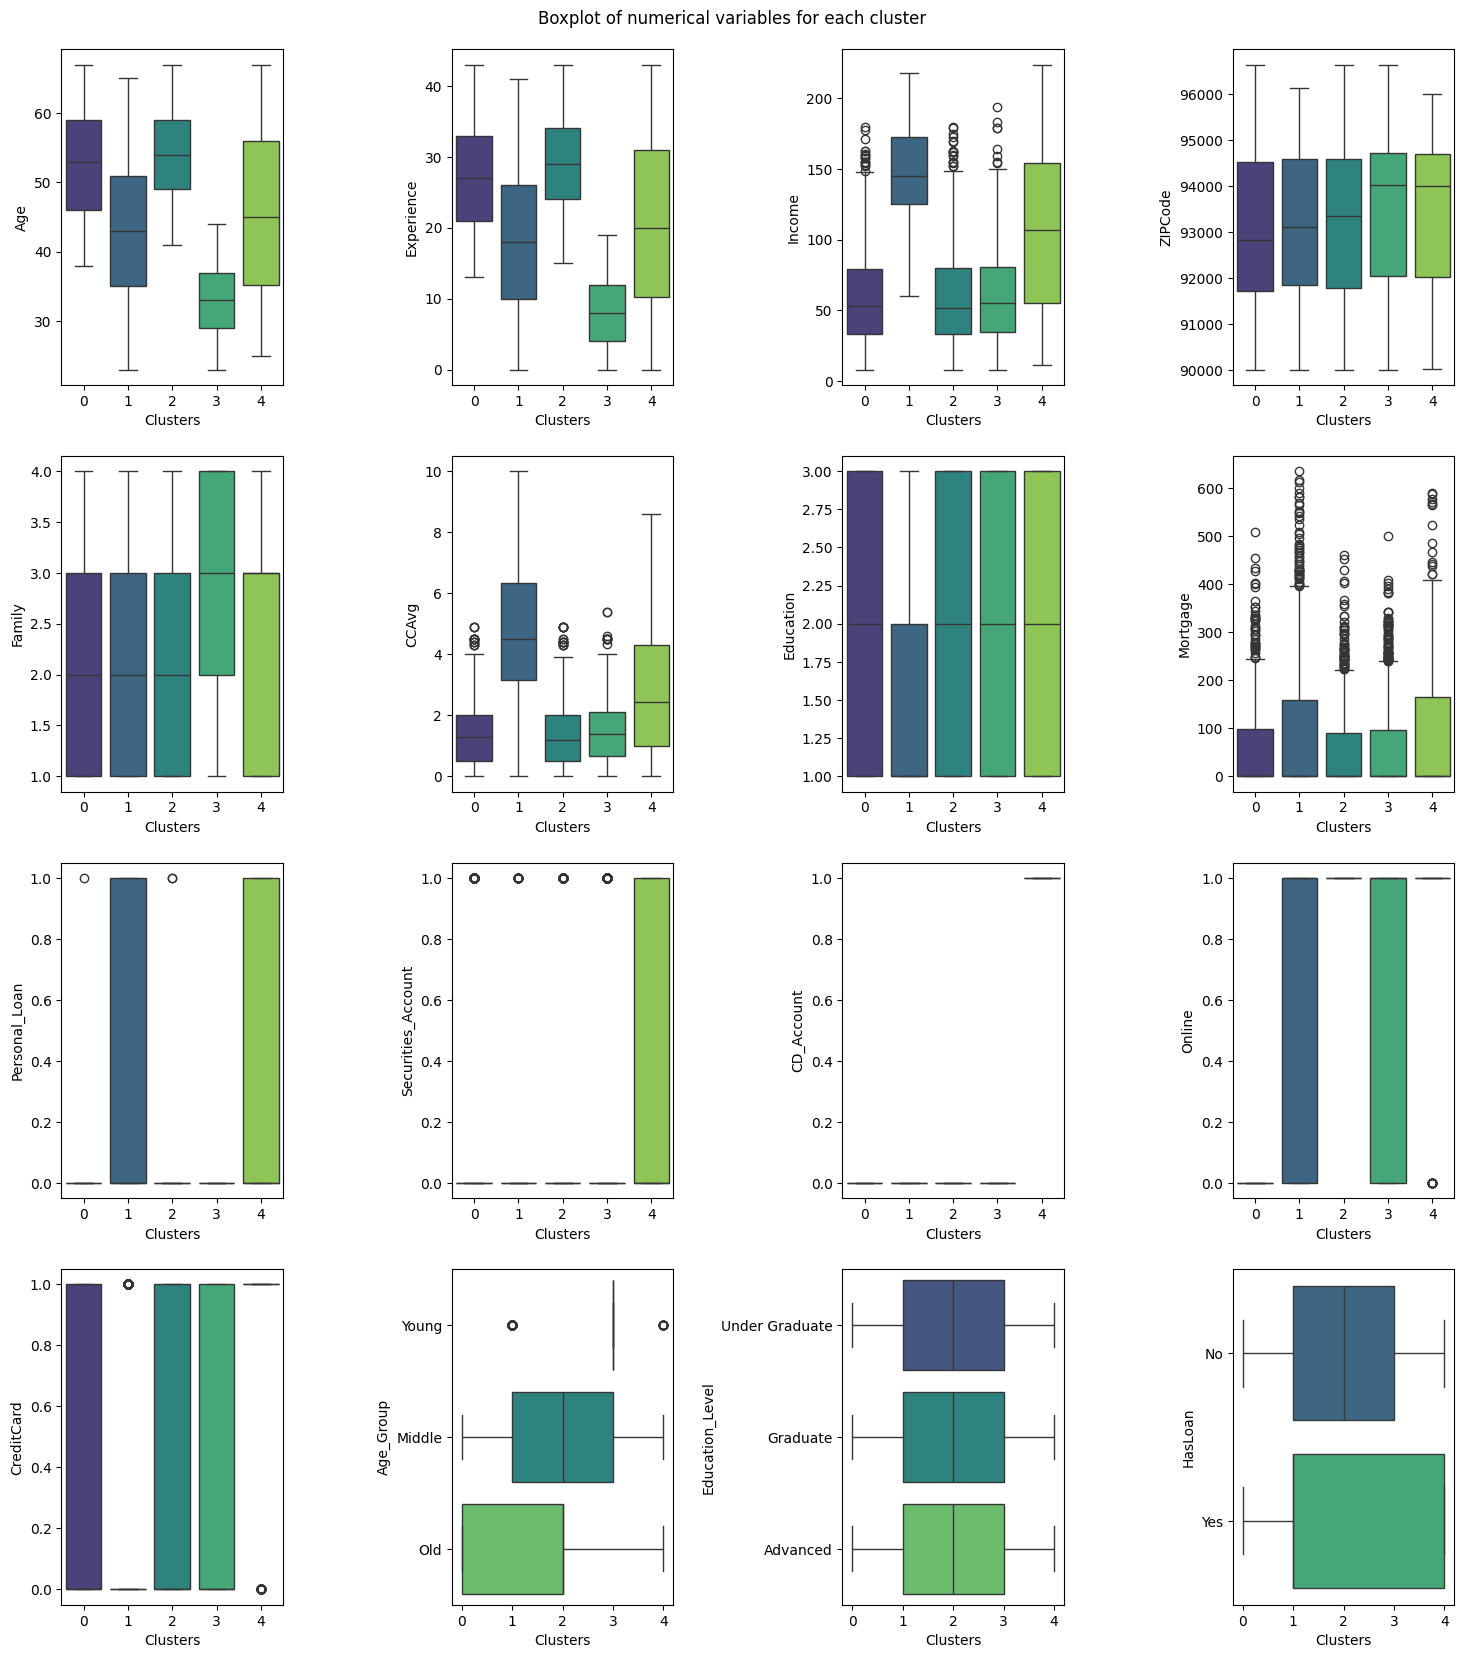

In [ ]:
# Prepare for plotting boxplots of numerical variables for each cluster
plt.figure(figsize=(15, 17))  # Set the figure size for the plot
plt.suptitle("Boxplot of numerical variables for each cluster")  # Set the main title for the plot

# Iterate over each numerical variable in the dataframe
for i, variable in enumerate(data.columns.to_list()[:-1]):
    plt.subplot(4, 4, i + 1)  # Create subplots in a x4 grid, starting from index 1
    sns.boxplot(data=data, x="Clusters", y=variable, palette='viridis')  # Create a boxplot for current variable and cluster

# Adjust layout of subplots to improve spacing
plt.tight_layout(pad=2.0)

In [ ]:
#data.groupby('Clusters')['Securities_Account'].count()
loan_cluster3=data[(data['Clusters']==3)& (data['Personal_Loan']==1)]
loan_cluster0=data[(data['Clusters']==0)& (data['Personal_Loan']==1)]
loan_cluster2=data[(data['Clusters']==2)& (data['Personal_Loan']==1)]
print("Number of customers having personal loan\n Cluster 0 =",loan_cluster0.shape[0],"\n Custer 2 =", loan_cluster2.shape[0],'\n Custer 3 =',loan_cluster3.shape[0])

Number of customers having personal loan
 Cluster 0 = 1 
 Custer 2 = 2 
 Custer 3 = 0


- CCAvg, Mortgage and Income variables have some outliers
- Cluster 0 and Cluster 2 and Cluster 3  have Most of the customers without any personal loan.

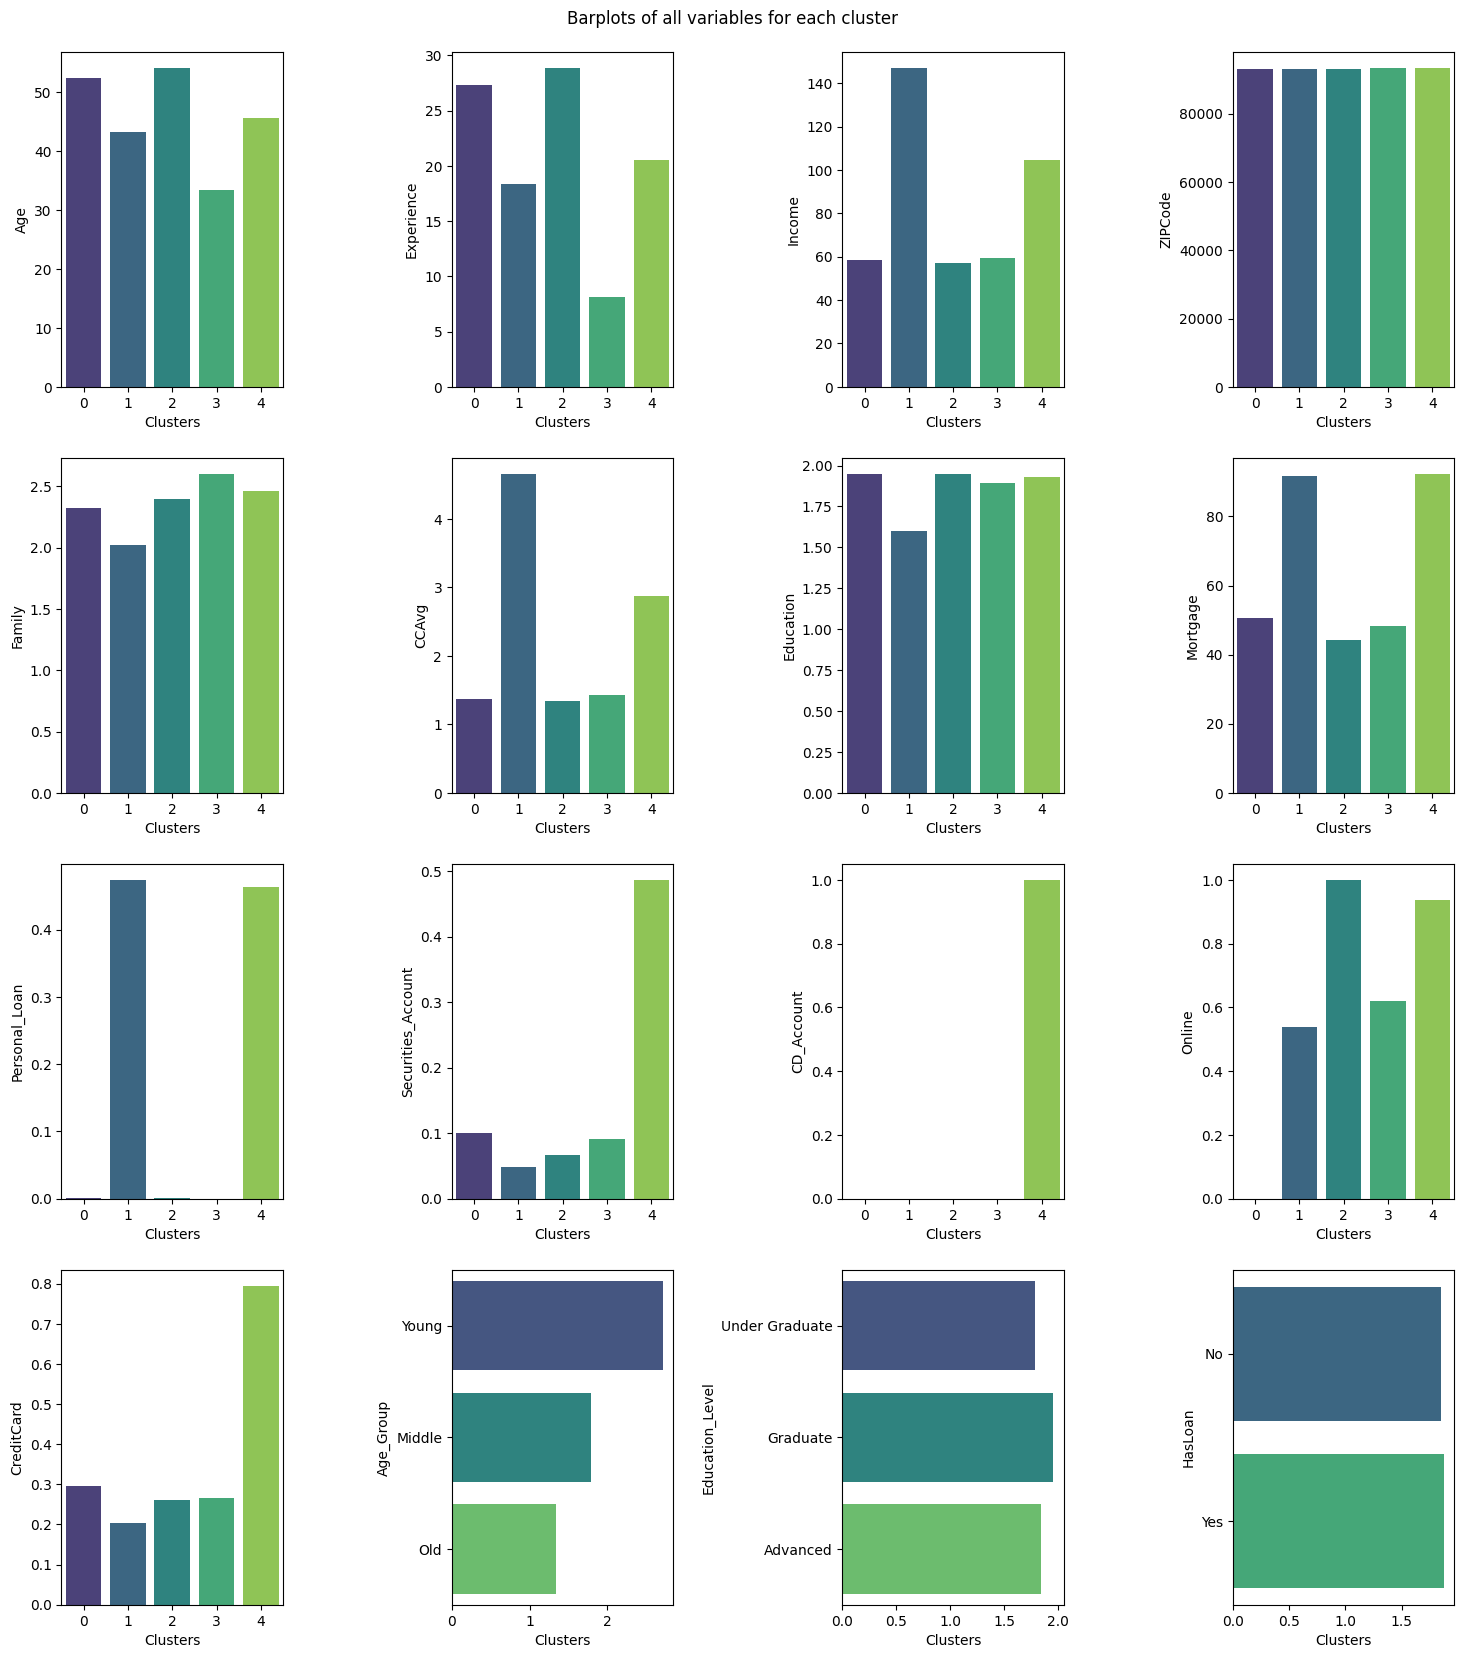

In [ ]:
# Prepare for plotting barplots of numerical variables for each cluster
plt.figure(figsize=(15, 17))  # Set the figure size for the plot
plt.suptitle("Barplots of all variables for each cluster")  # Set the main title for the plot
perc=True # make this False not to display %
data_dist=np.zeros((13,5))
for i, variable in enumerate(data.columns.to_list()[:-1]):
    plt.subplot(4, 4, i + 1)
    ax=sns.barplot(data=data, x="Clusters", y=variable, palette='viridis', errorbar=None)



plt.tight_layout(pad=2.0)


**Cluster 0:**
- The customers in this cluster have the high experience, education and they are older than customers in other clusters.
- Only one customer in this segment has personal Loan.
- These customers donot have a security of deposit certificate.
- These customers donot use any online services.
- These customers spent less on credicard.
- Around ~ 29% of customers have credit card issued by another bank.
- less likely to purchase laon as they have low borrowing behaviour

**Cluster 1:**
- The customers in this cluster have a high income, with the average being ~$140k.
- These customers belongs to family of 2.
- These customers spent a lot on credit card
- These customers have high mortgage of on average ~\$90K.
- On an average ~ 47 % of customers hold Peronal Loan.
- On an average ~ 5% of customers have security accounts.
- These customers donot have a security of deposit certificate.
- Around ~ 58 % of customers use online services.
- Around ~ 20% of customers have credit card issued by another bank.

**Cluster 2:**
- The customers in this cluster have the highest experience, education and they are older than customers in other clusters.
- These customers earn less than other clusters.
- These customers spent less on  credit cards.
- These customers have the lowest mortgage of on average ~\$42K.
- On an average 99% of these customers use banking online services
- ~ 29% of these customers have credit cards from other banks.
- Only one customer in this segment has personal Loan.

**Cluster 3:**
- The second highest cluster where customers spend on credit cards compared to other clusters.
- These customers have the highesr mortgage of on average ~\$90K.
-On an average ~ 46 % of customers hold Peronal Loan.
- Majority of these customers (~49%) have security account in the bank
- On an average ~99 % of these customers have a security of deposit certificate.
- On an average 96% of these customers use banking online services.
- 79 % of these customers hold credit cards from other banks.
- These customers will have less interest to personal loan since they spend a lot on credit cards

**Cluster 4:**
- These customers are the youngest compared to others
- On an average ~ 29% hold credit cards from other banks
- These customers could be a target group for the bank since they have no personal loans so far, they donot spend a lot on credit card.

## Recommendations
- The bank can start campaign on customers in Cluster 1 and Cluster 4.
- Customers spend less on creditcards will have more interest for Personal Loan.
- Cluster 4 customers spend very less on credit cards compared to customers in Cluster 1.
- Hence, the best target group would be customers in Cluster 4 as they are young, potential for growth and low spending behaviour.
